In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import random

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import yfinance as yf
import requests

In [3]:
s = '2022-01-04'
e = '2024-04-22'

download = False

In [4]:
df = pd.read_csv("https://query.data.world/s/pzd7uazpmpyortmg6fsuxiaoizllgu?dws=00000", encoding='ISO-8859-1')
display(df.head())

,Public Company Name (As Listed on Exchange),B Corp Impact Data ID,Ticker 1,Ticker 2,Ticker 3,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
0,"Allbirds, Inc.",001C000001SGhnyIAD,NASDAQGS:BIRD,NaN,NaN,2021.0,NaN,2016.0,active,NaN
1,Amalgamated Financial,001C000001K16JSIAZ,NASDAQGM:AMAL,NaN,NaN,2018.0,NaN,2017.0,active,NaN
2,"AppHarvest, Inc.",0013b00001o41JFAAY,NASDAQGS:APPH,NaN,NaN,2020.0,NaN,2019.0,delisted,2023.0
3,Arezzo&Co,0013b00001qHFddAAG,BOVESPA:ARZZ3,NaN,NaN,2011.0,NaN,2022.0,active,NaN
4,Arowana International,001C000001ZzPK4IAN,ASX: AWN,NaN,NaN,2013.0,2021.0,2018.0,delisted,NaN


In [5]:
df.drop(['B Corp Impact Data ID', 'Ticker 2', 'Ticker 3'], axis=1, inplace = True)
print(len(df))
df.dropna(axis=0, subset=['Public Company Name (As Listed on Exchange)'], inplace=True)
print(len(df))

999
68


In [6]:
display(df[df['Public Listing Status'] == 'delisted'])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
2,"AppHarvest, Inc.",NASDAQGS:APPH,2020.0,NaN,2019.0,delisted,2023.0
4,Arowana International,ASX: AWN,2013.0,2021.0,2018.0,delisted,NaN
14,Freshlocal Solutions,TSE: LOCL,2019.0,2021.0,2013.0,delisted,NaN


In [7]:
temp = df.copy()
temp = temp[temp['Public Listing Status'] == 'active']

temp['Ticker 1'].replace(": ", ":", regex=True, inplace=True)


print(len(temp))
temp['Exchange'] = temp['Ticker 1'].str.split(":").str[0]
temp['Ticker2'] = temp['Ticker 1'].str.split(":").str[1]
temp.dropna(subset=["Ticker2"], inplace=True) # Remove any NaN tickers

display(temp.head())

65


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT


In [8]:
display(temp.loc[40:,:])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2
41,Urb-it AB (publ),OM:URBIT,2017.0,NaN,2020.0,active,NaN,OM,URBIT
42,Vantea SMART S.p.A.,BIT:VNT,2021.0,NaN,2022.0,active,NaN,BIT,VNT
43,Viña Concha y Toro S.A.,SNSE:CONCHATORO,NaN,NaN,2021.0,active,NaN,SNSE,CONCHATORO
44,"Vital Farms, Inc.",NASDAQGM:VITL,2020.0,NaN,2015.0,active,NaN,NASDAQGM,VITL
45,VivoPower International PLC,NASDAQCM:VVPR,2016.0,NaN,2018.0,active,NaN,NASDAQCM,VVPR
46,Volpara Health Technologies Limited,ASX:VHT,2016.0,NaN,2022.0,active,NaN,ASX,VHT
47,Warby Parker Inc.,NYSE:WRBY,2021.0,NaN,2011.0,active,NaN,NYSE,WRBY
48,Weleda AG Group,OTC-X:BEKB:Weleda N-PS,NaN,NaN,2021.0,active,NaN,OTC-X,BEKB
49,Zevia PBC,NYSE:ZVIA,2021.0,NaN,2021.0,active,NaN,NYSE,ZVIA
51,Aussie Broadband Ltd,ASX:ABB,2020.0,NaN,2023.0,active,NaN,ASX,ABB


### Stocks are from Global Exchanges - build and maintain an exchange conversion dictionary to interface with Yahoo Finance

In [9]:
exchange_dict = {'ASX': '.AX', 
                 'WSE': '.WA',
                 'BOVESPA': '.SA',
                 'ETHEX': '',
                 'TSX': '.TO',
                 'ENXTPA': '.PA',
                 'BME': '.MC',
                 'ENXTBR': '.BR',
                 'KLSE': '.KL',
                 'LSE': '.L',
                 'TWSE': '.TW',
                 'NZSE': '.NZ',
                 'SGX': '.SI',
                 'BIT': '.MI',
                 'TASE': '.TA',
                 'XMIL': '.MI',
                 'NZE': '.NZ',
                 'BVMF': '.SA',
                 'HKG': '.HK',
                 'LON': '.L',
                 'MIL': '.MI',
                 'MOVI3': '.SA',
                 'TSE': '.T',
                 'BRK': '.L',
                 'SNSE': '.SN',
                 'MOVIDA B3': '.SA',
                 'NYSE': '',
                 'NASDAQGS': '',
                 'NASDAQGM': '',
                 'NASDAQCM': ''
                }

exchange_map = {exchanges: extention
                 for exchanges, extention in exchange_dict.items()
                 for exchange in exchanges}

temp['Intl Extention'] = temp['Exchange'].map(exchange_map)

In [10]:
temp['Ticker'] = temp['Ticker2'] + temp['Intl Extention'] 
mask = temp['Ticker'].isna()

# Check to see if we missed any:
temp[mask]

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
19,Heidelberg District Community Enterprise Limited,NSX:EIC,2019.0,NaN,2019.0,active,NaN,NSX,EIC,NaN,NaN
36,SIDERPERU,BVL:SIDERC1,2006.0,NaN,2022.0,active,NaN,BVL,SIDERC1,NaN,NaN
41,Urb-it AB (publ),OM:URBIT,2017.0,NaN,2020.0,active,NaN,OM,URBIT,NaN,NaN
48,Weleda AG Group,OTC-X:BEKB:Weleda N-PS,NaN,NaN,2021.0,active,NaN,OTC-X,BEKB,NaN,NaN
56,Vinedos Emiliana S.A.,XSGO:EMILIANA,1996.0,NaN,2023.0,active,NaN,XSGO,EMILIANA,NaN,NaN


In [11]:
#Find datafeed issues
tickers = temp['Ticker'].to_list()

count = 0
for t in tickers:
    try:
        ticker = yf.Ticker(t)
        info = None
    except:
        count +=1
        print(f"Cannot get info of {t}, it probably does not exist")

print("Total nans =", count, "which is", round(count/temp.shape[0],2)*100, '% of the total')


Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Total nans = 5 which is 8.0 % of the total


In [12]:
# Remove Nans from stock universe:

b_corp_df = temp[-mask].copy()
display(b_corp_df.head())


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD,,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL,,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3,.SA,ARZZ3.SA
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF,.AX,AEF.AX
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT,.WA,BFT.WA


In [13]:
isolate_us = False
if isolate_us:

    exchanges = set(temp['Exchange'])
    print(exchanges)
    us_ex = ['NYSE', 'NASDAQGS','NASDAQGM', 'NASDAQCM']
    us = temp[temp['Exchange'].isin(us_ex)]
    print("Isolating US Companies")
    display(us.head())


### List of Companies with B-Corp Subsidiaries
Unilever (NYSE: UN): (Pukka (UK), Mãe Terra (Brazil), Sir Kensington’s (US), Ben & Jerry’s (US), Olly Nutrition (US), Seventh Generation (US), Sundial (US), T2 Tea (Australia), Graze (UK))

B2W (B3: BTOW3): Courrieros (Brazil)

Grupo Soma (B3: SOMA3): Companhia Hering (Brazil)

Arezzo&Co (B3: ARZZ3): Reserva (Brazil)

Procter & Gamble (NYSE: PG): (New Chapter (US))

AB Inbev: (4 Pines Brewing Company)

Banco Estado: (Banco Estado Microempresas, Caja Vecina)

Coca-Cola: (Innocent Drinks)

Fairfax Financial: (The Redwoods Group)

Gap: (Athleta, Hill City)

Kikkoman: (Country Life)

Lactalis: (Stonyfield Farm)

Land O’ Lakes: (Vermonta Creamery)

Nestle: (Essential Living Foods, Garden of Life, Lily's Kitchen)

Oppenheimer Funds Inc.: (SNW Asset Management)

Rakuten: (OverDrive)

The Hain Celestial Group: (Ella’s Kitchen)

Vina Concha y Toro: (Fetzer Vineyards)


Hortfruti S.A.: Hortifruti Chile

Danone SA: (Danone North America, Alpro, Danone Waters of America, Danone Canada, -Aguas Danone Argentina, Bledina, Danone Aqua Indonesia, Danone Egypt, Danone Iberia, Danone Manifesto Ventures, Danone UK, Grameen Danone Foods, Happy Family, Les 2 Vaches, Danone Waters Germany, Danone Dairy Ireland, Danone Waters Spain, Danone Netherlands, Danone Dairy Belgium, Nutricia Bago, Danone ELN Greater China, Danone Japan, Volvic, Danone Brazil)

Caixabank (Imagin Ban)

Banco Sabadell (Sogeviso)

iSun (SunCommon)

In [14]:
add_subs = False
public_subs = ['UL', 'SOMA3.SA', 'ABI.BR', 'PG', 'FFH.TO', 'KO', 'GPS', 'KIK.F', 'NESN.SW',
               'OPY', '4755.T', 'HAIN', 'DANOY', 'CABK.MC', 'ISUN']

In [15]:
def get_stock_data (df):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs
    tickers_data= {}
    
    for ticker in tickers_list:
        ticker_object = yf.Ticker(ticker)
        
        #convert info() output from dictionary to dataframe
        temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
        temp.reset_index(inplace=True)
        temp.columns = ["Attribute", "Recent"]

        # add (ticker, dataframe) to main dictionary
        tickers_data[ticker] = temp

    return tickers_data
        
        

In [16]:
if isolate_us:
    load_stock_data = get_stock_data (us)
else:
    load_stock_data = get_stock_data (b_corp_df)
    
print("Number of Stock Records Loaded", len(load_stock_data))

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SZL.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SZL.AX&crumb=NB.zG8HhBks


Number of Stock Records Loaded 57


In [17]:
# Clean df:
stock_data = pd.concat(load_stock_data) #turn from dict to df
stock_data = stock_data.reset_index()

del stock_data["level_1"] # clean up unnecessary column
stock_data.columns = ["Ticker", "Attribute", "Recent"] # update column names


attr_to_keep = ['shortName', 'longName', 'industry', 'sector','previousClose', 'sharesOutstanding', 'impliedSharesOutstanding',
               'marketCap',  'currency', 'country', 'website', 'enterpriseValue',
                'trailingEps', 'forwardEps', 'enterprisetoEbitda', 'ebitda', 'grossMargins', 'ebitdaMargins', 'operatingMargins']


stock_data = stock_data[stock_data["Attribute"].isin(attr_to_keep)].reset_index()
del stock_data["index"] # clean up unnecessary column



display(stock_data.head(15))

,Ticker,Attribute,Recent
0,BIRD,country,United States
1,BIRD,website,https://www.allbirds.com
2,BIRD,industry,Apparel Retail
3,BIRD,sector,Consumer Cyclical
4,BIRD,previousClose,0.6126
5,BIRD,marketCap,98467416
6,BIRD,currency,USD
7,BIRD,enterpriseValue,58985908
8,BIRD,sharesOutstanding,102641000
9,BIRD,impliedSharesOutstanding,155188992


In [18]:
print("Number of Stocks:", len(stock_data['Ticker'].unique()))
display(stock_data['Ticker'].unique())

Number of Stocks: 54


array(['BIRD', 'AMAL', 'ARZZ3.SA', 'AEF.AX', 'BFT.WA', 'BIO.AX',
       'CWEB.TO', 'CLSA3.SA', 'MLMFI.PA', 'COUR', 'FLOW.TO', 'FREY.PA',
       'GFI.NZ', 'GROV', 'HAN.MC', 'HLZ.MC', 'INCLU.BR', 'IBAB.BR',
       'KPG.AX', 'KCT.L', 'KMD.NZ', 'LMND', 'LFG.AX', 'MOVI3.SA',
       'NTCO3.SA', '2897.TW', '1H2.SI', 'ALQP.PA', 'RETI.MI', '6088.T',
       'SML.NZ', 'COCO', 'VNT.MI', 'CONCHATORO.SN', 'VITL', 'VVPR',
       'VHT.AX', 'WRBY', 'ZVIA', 'ABB.AX', 'TIME.MI', 'CVT.NZ', 'DOX.MI',
       'SOMA3.SA', '1112.HK', 'HMGS.TA', '1346.HK', '0973.HK', 'MME.AX',
       'MPR.AX', 'TENG.L', 'TPX.L', 'XSG.L', 'XHS.MI'], dtype=object)

In [19]:
stock_data_filtered = stock_data.pivot(columns = 'Attribute', index='Ticker', values='Recent')
stock_data_filtered.columns

# More info:
#stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
#                                           'sharesOutstanding', 'impliedSharesOutstanding','marketCap', 'enterpriseValue',
#                                           'ebitda', 'forwardEps',  'trailingEps', 'grossMargins', 'operatingMargins', 'ebitdaMargins',
#                                             'industry', 'sector', 'website']]
# Only essential info:
stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
                                           'impliedSharesOutstanding','marketCap','industry', 'sector', 'website']]

display(stock_data_filtered.head(10))

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website
Ticker,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1472169984,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.22,645561024,6636367360,Packaged Foods,Consumer Defensive,https://www.hh.global
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.87,645899008,556017024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.08,115845000,9267600,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.88,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1583.0,43201300,66776170496,Specialty Business Services,Industrials,https://www.sigmaxyz.com
ABB.AX,AUSSIEBAND FPO [ABB],Aussie Broadband Limited,Australia,AUD,3.61,295184992,1083328896,Telecom Services,Communication Services,https://www.aussiebroadband.com.au
AEF.AX,A ETHICAL FPO [AEF],Australian Ethical Investment Limited,Australia,AUD,4.89,112782000,551503936,Asset Management,Financial Services,https://www.australianethical.com.au
ALQP.PA,QUADPACK,"Quadpack Industries, S.A.",Spain,EUR,13.9,4382130,61038320,Packaging & Containers,Consumer Cyclical,https://www.quadpack.com


## Add in stock price as of beginning of index:

In [20]:
def get_starting_price(df, start = s):
    tickers_list = df.index.tolist()
    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    
    prices = pd.DataFrame.from_dict(first_object.history(start=start, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]

    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        try:
            temp = pd.DataFrame.from_dict(ticker_object.history(start=start, interval = "1d"))
            temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
            temp.columns = [ticker]
            prices = prices.merge(temp, how="outer", left_index=True, right_index=True)
        except:
            continue
    
    
    # Collapse date across international zones:
    prices.index = pd.to_datetime(prices.index).date
      
        
    prices = prices.groupby(prices.index).ffill() 
    prices = prices.groupby(prices.index).bfill()
    prices = prices.groupby(prices.index).last()
    
    
    return prices

In [21]:
data = get_starting_price(stock_data_filtered, start=s)
starting_px = data.filter(like='2022-01-04', axis=0).T
#data.to_csv('QC_starting_price.csv')

### Incorporate exchange rates to translate price and market cap into USD

In [22]:
# Get avaialable currencies
currency_dict = {}

url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/symbols"

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
    "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
          }

response = requests.get(url, headers=headers)

api_data = response.json()

    
for symbol, curr in api_data['symbols'].items():
    currency_dict[symbol] = [curr, 0]



In [23]:
## Access Exchange Rates at Start of Measurement:
def get_rates(date):
    url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/" + str(date)

    #querystring = {"from":"USD","to":"EUR,GBP"}
    querystring = {'base':'USD'}

        #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
    headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
        "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
              }

    response = requests.get(url, headers=headers, params=querystring)

    return response.json()

    #for key in exch_data: 
    #    print(key,":", exch_data[key]) 

In [24]:
## Combine date from exch_data with names / symbols in currency_dict:
exch_data = get_rates(date='2024-01-02')

for symbol, rate in exch_data['rates'].items():
    for key in currency_dict.keys():
        if symbol == key:
            currency_dict[key][1] = rate

In [25]:
currency_dict

{'ANG': ['Netherlands Antillean Guilder', 1.802754],
 'SVC': ['Salvadoran Colón', 0],
 'CAD': ['Canadian Dollar', 1.332265],
 'XCD': ['East Caribbean Dollar', 2.70255],
 'MVR': ['Maldivian Rufiyaa', 15.394981],
 'HRK': ['Croatian Kuna', 6.98177],
 'AUD': ['Australian Dollar', 1.478066],
 'MWK': ['Malawian Kwacha', 1682.000329],
 'XAG': ['Silver (troy ounce)', 0.042301],
 'MAD': ['Moroccan Dirham', 9.929013],
 'PHP': ['Philippine Peso', 55.580372],
 'NAD': ['Namibian Dollar', 18.569884],
 'GNF': ['Guinean Franc', 8600.000003],
 'KES': ['Kenyan Shilling', 157.349704],
 'MZN': ['Mozambican Metical', 63.24995],
 'BTN': ['Bhutanese Ngultrum', 84.025935],
 'MGA': ['Malagasy Ariary', 4589.99995],
 'AZN': ['Azerbaijani Manat', 1.696139],
 'XAU': ['Gold (troy ounce)', 0.000486],
 'RON': ['Romanian Leu', 4.542902],
 'CHF': ['Swiss Franc', 0.850195],
 'EGP': ['Egyptian Pound', 30.925201],
 'BSD': ['Bahamian Dollar', 1.000292],
 'TWD': ['New Taiwan Dollar', 30.894018],
 'GGP': ['Guernsey Pound', 0

In [26]:
## Add exhange rates and calculate USD equivalents:

#exchange_map = {exchanges: extention
#                 for exchanges, extention in exchange_dict.items()
#                 for exchange in exchanges}


currency_map = {symbols: rate
                 for symbols, name in currency_dict.items()
                 for rate in name}



stock_data_filtered['beginningUSDExchangeRate'] = stock_data_filtered['currency'].map(currency_map)


In [27]:
stock_data_filtered = stock_data_filtered.join(starting_px)

In [28]:
# Check to see that exchange rates mapped correctly:
stock_data_filtered.head(15)

,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,beginningUSDExchangeRate,2022-01-04
Ticker,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1472169984,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.815320,31.003922
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.22,645561024,6636367360,Packaged Foods,Consumer Defensive,https://www.hh.global,7.815320,10.629018
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.87,645899008,556017024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.815320,0.305428
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.08,115845000,9267600,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.326405,0.110000
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.88,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,30.894018,7.403813
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1583.0,43201300,66776170496,Specialty Business Services,Industrials,https://www.sigmaxyz.com,142.156502,1166.818604
ABB.AX,AUSSIEBAND FPO [ABB],Aussie Broadband Limited,Australia,AUD,3.61,295184992,1083328896,Telecom Services,Communication Services,https://www.aussiebroadband.com.au,1.478066,4.600000
AEF.AX,A ETHICAL FPO [AEF],Australian Ethical Investment Limited,Australia,AUD,4.89,112782000,551503936,Asset Management,Financial Services,https://www.australianethical.com.au,1.478066,13.177149
ALQP.PA,QUADPACK,"Quadpack Industries, S.A.",Spain,EUR,13.9,4382130,61038320,Packaging & Containers,Consumer Cyclical,https://www.quadpack.com,0.913960,23.799999


In [29]:
# Calculate USD price and USD marketcap
s_d = dt.strptime(s, '%Y-%M-%d').date()
stock_data_filtered['beginningCloseUSD'] = stock_data_filtered[s_d] / stock_data_filtered['beginningUSDExchangeRate']
stock_data_filtered['beginningMarketCapUSD'] = stock_data_filtered['impliedSharesOutstanding']* stock_data_filtered['beginningCloseUSD']

stock_data_filtered.head(20)

,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,beginningUSDExchangeRate,2022-01-04,beginningCloseUSD,beginningMarketCapUSD
Ticker,,,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1472169984,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.815320,31.003922,3.967070,5840201377.746689
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.22,645561024,6636367360,Packaged Foods,Consumer Defensive,https://www.hh.global,7.815320,10.629018,1.360023,877978078.233685
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.87,645899008,556017024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.815320,0.305428,0.039081,25242197.742691
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.08,115845000,9267600,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.326405,0.110000,0.082931,9607133.515744
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.88,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,30.894018,7.403813,0.239652,651007444.449265
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1583.0,43201300,66776170496,Specialty Business Services,Industrials,https://www.sigmaxyz.com,142.156502,1166.818604,8.207986,354595673.267619
ABB.AX,AUSSIEBAND FPO [ABB],Aussie Broadband Limited,Australia,AUD,3.61,295184992,1083328896,Telecom Services,Communication Services,https://www.aussiebroadband.com.au,1.478066,4.600000,3.112175,918667322.737256
AEF.AX,A ETHICAL FPO [AEF],Australian Ethical Investment Limited,Australia,AUD,4.89,112782000,551503936,Asset Management,Financial Services,https://www.australianethical.com.au,1.478066,13.177149,8.915129,1005466060.447263
ALQP.PA,QUADPACK,"Quadpack Industries, S.A.",Spain,EUR,13.9,4382130,61038320,Packaging & Containers,Consumer Cyclical,https://www.quadpack.com,0.913960,23.799999,26.040526,114112970.65156


In [30]:
if download:
    stock_data_filtered.to_csv("mkt_cap_details.csv")

## Filter Universe of Stocks by USD MarketCap

In [116]:
def filter_index(df, size=True, num=True, size_thresh = 1000000000, num_thresh = 20, col='beginningMarketCapUSD'):
    temp = df.copy()
    if size == True:
        temp = temp[temp[col] >= size_thresh]
    
    if num == True:
        temp.sort_values(by=[col], ascending=False, inplace = True)
        temp = temp.iloc[0:num_thresh,:]
            
    if 'ABI.BR' in temp.index:
        temp.loc['ABI.BR','impliedSharesOutstanding'] = 1982790000
    
    return temp



In [32]:
stock_index_top20 = filter_index(stock_data_filtered, size = False, num_thresh=20)
stock_index_top30 = filter_index(stock_data_filtered, size = False, num_thresh=30)
stock_index_over1b = filter_index(stock_data_filtered, size = True, num=False, size_thresh=1000000000)
stock_index_cutoff = filter_index(stock_data_filtered, size = False, num_thresh=40)

df_list = [stock_index_top20, stock_index_top30, stock_index_over1b, stock_index_cutoff]

print(stock_index_top20.shape, stock_index_top30.shape, stock_index_over1b.shape, stock_index_cutoff.shape)

(20, 14) (30, 14) (14, 14) (40, 14)


# Construct Index as of Start Date

In [33]:
stock_data_filtered.shape

(54, 14)

In [34]:
# QC Market Cap cutoffs:
stock_data_filtered.to_csv('Initial_MCs.csv')

In [35]:
stock_index_top20

,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,beginningUSDExchangeRate,2022-01-04,beginningCloseUSD,beginningMarketCapUSD
Ticker,,,,,,,,,,,,,,
NTCO3.SA,GRUPO NATURAON NM,Natura &Co Holding S.A.,Brazil,BRL,16.88,1383680000,23107457024,Household & Personal Products,Consumer Defensive,https://www.naturaeco.com,4.923979,22.226015,4.513832,6245699374.638916
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1472169984,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.815320,31.003922,3.967070,5840201377.746689
WRBY,Warby Parker Inc.,Warby Parker Inc.,United States,USD,12.92,118163000,1478219136,Medical Instruments & Supplies,Healthcare,https://www.warbyparker.com,1.000000,44.080002,44.080002,5208625256.362915
COUR,"Coursera, Inc.","Coursera, Inc.",United States,USD,11.97,157324000,1864682752,Education & Training Services,Consumer Defensive,https://www.coursera.org,1.000000,25.000000,25.000000,3933100000.0
LMND,"Lemonade, Inc.","Lemonade, Inc.",United States,USD,17.95,70547104,1260568576,Insurance - Property & Casualty,Financial Services,https://www.lemonade.com,1.000000,39.029999,39.029999,2753453383.00293
BIRD,"Allbirds, Inc.","Allbirds, Inc.",United States,USD,0.6126,155188992,98467416,Apparel Retail,Consumer Cyclical,https://www.allbirds.com,1.000000,15.590000,15.590000,2419396408.959961
GROV,"Grove Collaborative Holdings, I","Grove Collaborative Holdings, Inc.",United States,USD,1.57,38182100,61855004,Household & Personal Products,Consumer Defensive,https://www.grove.co,1.000000,49.450001,49.450001,1888104874.13063
SOMA3.SA,GRUPO SOMA ON NM,Grupo de Moda Soma S.A.,Brazil,BRL,6.11,793753024,4810499072,Apparel Retail,Consumer Cyclical,https://www.somagrupo.com.br,4.923979,11.305203,2.295949,1822416264.507435
ARZZ3.SA,AREZZO CO ON NM,Arezzo Indústria e Comércio S.A.,Brazil,BRL,52.03,112422000,5833061888,Footwear & Accessories,Consumer Cyclical,https://ri.arezzoco.com.br,4.923979,66.436813,13.492505,1516854444.533318


## Manual Adjustments (if needed)
### Adjust Methodology Here:

In [36]:
for df in df_list:
    if 'MLMFI.PA' in df.index:
        df.drop('MLMFI.PA', axis=0, inplace=True)
        
        
'''
    
    ## Eliminate if market cap < 100M:
    
    if '1346.HK' in df.index:
        df.drop('1346.HK', axis=0, inplace=True)
    if 'BIO.AX' in df.index:
        df.drop('BIO.AX', axis=0, inplace=True)
    if 'RETI.MI' in df.index:
        df.drop('RETI.MI', axis=0, inplace=True)
        
    ## Eliminate if price < $1.00:
   
    if '2897.TW' in df.index:
        df.drop('2897.TW', axis=0, inplace=True)
    if 'KMD.NZ' in df.index:
        df.drop('KMD.NZ', axis=0, inplace=True)
    if 'VHT.AX' in df.index:
        df.drop('VHT.AX', axis=0, inplace=True)    
'''        

"\n    \n    ## Eliminate if market cap < 100M:\n    \n    if '1346.HK' in df.index:\n        df.drop('1346.HK', axis=0, inplace=True)\n    if 'BIO.AX' in df.index:\n        df.drop('BIO.AX', axis=0, inplace=True)\n    if 'RETI.MI' in df.index:\n        df.drop('RETI.MI', axis=0, inplace=True)\n        \n    ## Eliminate if price < $1.00:\n   \n    if '2897.TW' in df.index:\n        df.drop('2897.TW', axis=0, inplace=True)\n    if 'KMD.NZ' in df.index:\n        df.drop('KMD.NZ', axis=0, inplace=True)\n    if 'VHT.AX' in df.index:\n        df.drop('VHT.AX', axis=0, inplace=True)    \n"

In [37]:
assert stock_index_top20.shape[0] == 20
assert stock_index_top30.shape[0] == 30

# DECISION:
# Set Index and Get Price History

In [38]:
stock_index = stock_index_top20.copy()
start_date = s
end_date = '2022-12-31'

In [39]:
def get_price_history (df, start = start_date, end=end_date):
    tickers_list = df.index.tolist()
    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]

    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        try:
            temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
            temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
            temp.columns = [ticker]
            prices = prices.merge(temp, how="outer", left_index=True, right_index=True)
        except:
            continue
    
    
    # Collapse date across international zones:
    prices.index = pd.to_datetime(prices.index).date
      
    prices = prices.groupby(prices.index).ffill() 
    prices = prices.groupby(prices.index).bfill()
    prices = prices.groupby(prices.index).last()
    
    
    return prices

In [40]:
price_history_df = get_price_history (stock_index)

stock_universe = list(price_history_df.columns)
print ("Number of stocks", len(stock_universe))

Number of stocks 20


In [41]:
display(price_history_df.head())


,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,CONCHATORO.SN,FREY.PA,AEF.AX,MOVI3.SA,LFG.AX,ABB.AX,1112.HK,VITL,COCO,2897.TW
2022-01-03,NaN,31.100807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.12,NaN,29.694746,13.060878,NaN,4.465664,4.74,10.558157,NaN,NaN,7.403813
2022-01-04,22.226017,31.003922,44.080002,25.000000,39.029999,15.59,49.450001,11.305203,66.436813,2.12,1203.634277,29.164482,13.177148,13.564058,4.481903,4.60,10.629018,18.180000,12.00,7.403813
2022-01-05,21.198648,30.907034,41.660000,24.010000,36.790001,13.57,49.700001,10.226650,63.242928,2.10,1234.558594,29.164482,12.382644,12.642316,4.465664,4.21,11.107324,17.570000,11.49,7.431647
2022-01-06,20.960150,31.439913,42.389999,23.410000,35.330002,15.23,49.599998,10.540411,64.399170,2.07,1249.928223,29.164482,12.266375,12.597133,4.465664,4.46,10.877028,18.290001,10.96,7.440926
2022-01-07,20.281355,NaN,39.709999,23.219999,37.139999,13.94,49.700001,10.295285,63.887394,NaN,1240.669189,NaN,NaN,12.353143,NaN,NaN,NaN,18.510000,10.91,NaN


In [42]:
def get_country_info(price_df, info_df):
    tickers_list = price_df.columns
    
    #access currency, impliedSharesOutstanding (local currency): ## HAVE TO REVIEW FOR STOCK CHANGES
    currencies = []
    implied_SO = []
    for col in price_df.columns:
        idx = np.where(info_df.index == col)
        currencies.append(info_df.iloc[idx]['currency'].values[0])
        implied_SO.append(info_df.iloc[idx]['impliedSharesOutstanding'].values[0])
        
    for i in range(len(price_df.columns)):
        col = price_df.columns[i]
        price_df[col+'_currency'] = currencies[i]
        price_df[col+'_SO'] = implied_SO[i]
    
    return price_df, currencies
     

In [43]:
price_and_info_df, index_currencies = get_country_info(price_history_df, stock_index)

### Get historical exchange rates

In [44]:
def get_historical_exchange (price_df, currencies):
    #currencies = list(set(currencies))
    
    querystring = {"base":"USD"}

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
    headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
        "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
              }
    daily_rate_df = pd.DataFrame()
    
    for idx in price_df.index:
        loc = np.where(price_df.index == idx)
        url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/" + str(idx)
        response = requests.get(url, headers=headers, params=querystring)
        response = response.json()
        
        daily_df = pd.DataFrame(response)
        daily_df = daily_df[['date', 'rates']].reset_index()
        daily_df = daily_df.pivot(columns='index', index='date', values='rates')

        daily_rate_df = pd.concat([daily_rate_df, daily_df], axis=0)

        
    daily_rate_df.index = pd.to_datetime(daily_rate_df.index).date
    return daily_rate_df


# Decision:
### Run API to get all of the exchange rates? Or upload stored data?

In [45]:
display(price_and_info_df.head())
display(price_and_info_df.tail())

,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,ABB.AX_currency,ABB.AX_SO,1112.HK_currency,1112.HK_SO,VITL_currency,VITL_SO,COCO_currency,COCO_SO,2897.TW_currency,2897.TW_SO
2022-01-03,NaN,31.100807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.12,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-01-04,22.226017,31.003922,44.080002,25.000000,39.029999,15.59,49.450001,11.305203,66.436813,2.12,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-01-05,21.198648,30.907034,41.660000,24.010000,36.790001,13.57,49.700001,10.226650,63.242928,2.10,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-01-06,20.960150,31.439913,42.389999,23.410000,35.330002,15.23,49.599998,10.540411,64.399170,2.07,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-01-07,20.281355,NaN,39.709999,23.219999,37.139999,13.94,49.700001,10.295285,63.887394,NaN,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016


,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,ABB.AX_currency,ABB.AX_SO,1112.HK_currency,1112.HK_SO,VITL_currency,VITL_SO,COCO_currency,COCO_SO,2897.TW_currency,2897.TW_SO
2022-12-26,10.374391,NaN,NaN,NaN,NaN,NaN,NaN,10.076818,76.290283,NaN,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-12-27,9.857518,23.837166,12.99,11.39,13.41,2.270,1.385,9.661891,74.357780,0.255,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-12-28,10.568219,23.837166,13.01,11.22,12.91,2.245,1.385,10.106457,76.406822,0.245,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-12-29,10.715898,24.084440,13.75,11.76,13.84,2.370,1.490,10.017544,75.989243,0.245,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016
2022-12-30,NaN,NaN,13.49,11.83,13.68,2.420,1.995,NaN,NaN,NaN,...,AUD,295184992,HKD,645561024,USD,41795800,USD,56929300,TWD,2716470016


In [46]:
run_api = False

In [47]:
# Load stored rates:
def load_rates(filename = "daily_rates_df_2022_2024_4_19.csv"):
    daily_rates_df = pd.read_csv(filename)
    daily_rates_df.set_index("Date", inplace=True)
    daily_rates_df.index = pd.to_datetime(daily_rates_df.index).date
    
    last_date = daily_rates_df.index[-1]
    return daily_rates_df, last_date

In [48]:

df_dates, ed = load_rates()

currency_start = ed+timedelta(days=1)
currency_end = e


/var/folders/p5/k8h2_yjj0nncvy0f82hy1xvc0000gn/T/ipykernel_20022/2230597786.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_rates_df.index = pd.to_datetime(daily_rates_df.index).date


In [49]:
import warnings
warnings.filterwarnings("ignore")

ext = str(dt.today().year) + "_" + str(dt.today().month) + "_" + str(dt.today().day)+ "_" + str(dt.today().hour)
filename = "daily_rates_df" + ext + ".csv"

if run_api:
    # adjust dates to only get currency data after stored file
    hist_currency_df = price_and_info_df.copy()
    hist_currency_df = hist_currency_df.loc[currency_start:,:]
    
    daily_rates_df = get_historical_exchange(hist_currency_df, index_currencies)
    display(daily_rates_df.head())
    display(daily_rates_df.tail())
    daily_rates_df.to_csv(filename)

else:
    daily_rates_df = df_dates.copy()
    

In [50]:
daily_rates_df.head()

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-02,3.672980,103.749983,106.650326,480.234325,1.802591,550.590435,102.664691,1.376179,1.8000,1.698647,...,0.000547,2.70255,0.714652,579.499504,105.850128,250.249584,15.964896,9001.202654,16.663427,321.999592
2022-01-03,3.673103,103.750299,106.249880,481.590005,1.802973,554.203977,102.958502,1.389502,1.8005,1.701522,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
2022-01-04,3.673096,104.899369,105.874950,482.301630,1.801500,553.427992,103.104100,1.381105,1.8000,1.698131,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592
2022-01-05,3.673102,105.250158,106.902530,483.164239,1.802797,552.652983,103.102801,1.384754,1.8005,1.691373,...,0.000552,2.70255,0.716268,579.501261,105.550109,250.249682,15.893898,9001.187415,16.770433,321.999592
2022-01-06,3.673102,104.999962,107.350118,483.038449,1.802366,551.700853,103.228600,1.395982,1.8000,1.700773,...,0.000558,2.70255,0.714658,580.493234,105.879870,249.999702,15.721510,9001.191881,16.776058,321.999592


In [51]:
daily_rates_df.tail()

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2024-04-15,3.672500,71.999838,95.201353,395.760311,1.801369,832.824047,868.249953,1.552277,1.8025,1.699549,...,0.000420,2.70255,0.759449,613.503270,112.449742,250.325013,18.982403,9001.201294,25.061425,321.999592
2024-04-16,3.672502,72.212319,95.150069,395.239784,1.801387,837.497174,868.770498,1.559385,1.8000,1.699877,...,0.000420,2.70255,0.759466,617.493331,111.574989,250.350019,19.031650,9001.202977,25.062904,321.999592
2024-04-17,3.672499,71.631438,95.179988,395.097576,1.797381,837.490979,869.255103,1.552925,1.8000,1.691994,...,0.000422,2.70255,0.757759,614.865536,111.575000,250.350277,18.995897,9001.199844,25.206689,321.999592
2024-04-18,3.672725,72.000107,95.110057,394.069736,1.801845,837.503789,869.880802,1.556529,1.8025,1.693572,...,0.000420,2.70255,0.759657,613.495264,112.549704,250.298620,19.168350,9001.204360,25.573445,321.999592
2024-04-19,3.672604,72.000368,94.920403,392.603986,1.802376,837.000367,870.106930,1.558604,1.8000,1.703970,...,0.000418,2.70255,0.759404,615.503595,112.450363,250.350363,19.294820,9001.203587,25.676983,321.999592


In [52]:
daily_price_and_info_df = price_and_info_df.join(daily_rates_df)
display(daily_price_and_info_df.head())
display(daily_price_and_info_df.tail())

,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-03,NaN,31.100807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.12,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
2022-01-04,22.226017,31.003922,44.080002,25.000000,39.029999,15.59,49.450001,11.305203,66.436813,2.12,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592
2022-01-05,21.198648,30.907034,41.660000,24.010000,36.790001,13.57,49.700001,10.226650,63.242928,2.10,...,0.000552,2.70255,0.716268,579.501261,105.550109,250.249682,15.893898,9001.187415,16.770433,321.999592
2022-01-06,20.960150,31.439913,42.389999,23.410000,35.330002,15.23,49.599998,10.540411,64.399170,2.07,...,0.000558,2.70255,0.714658,580.493234,105.879870,249.999702,15.721510,9001.191881,16.776058,321.999592
2022-01-07,20.281355,NaN,39.709999,23.219999,37.139999,13.94,49.700001,10.295285,63.887394,NaN,...,0.000556,2.70255,0.715161,579.503602,105.525037,250.250364,15.585745,9001.203593,16.856372,321.999592


,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-12-26,10.374391,NaN,NaN,NaN,NaN,NaN,NaN,10.076818,76.290283,NaN,...,0.000555,2.70255,0.750694,617.501917,112.649647,250.349884,17.035520,9001.195377,17.900278,321.999592
2022-12-27,9.857518,23.837166,12.99,11.39,13.41,2.270,1.385,9.661891,74.357780,0.255,...,0.000552,2.70255,0.751705,615.510014,112.650044,250.350158,17.208498,9001.202829,17.971823,321.999592
2022-12-28,10.568219,23.837166,13.01,11.22,12.91,2.245,1.385,10.106457,76.406822,0.245,...,0.000554,2.70255,0.751910,615.000030,112.650533,250.350128,17.105199,9001.182860,17.997538,321.999592
2022-12-29,10.715898,24.084440,13.75,11.76,13.84,2.370,1.490,10.017544,75.989243,0.245,...,0.000551,2.70255,0.751425,616.999993,112.300971,250.249575,16.936410,9001.186468,18.079183,321.999592
2022-12-30,NaN,NaN,13.49,11.83,13.68,2.420,1.995,NaN,NaN,NaN,...,0.000548,2.70255,0.751548,615.503597,111.950364,250.303593,17.023015,9001.203589,18.111180,321.999592


In [53]:
def convert_price_mktcap_USD (px_info_df, stock_list):
    
    for stock in stock_list:
        col_name = stock+"_currency"
        col2_name = stock+"_SO"
        curr = px_info_df[col_name][0]
        shares_out = px_info_df[col2_name][0]
        new_col = stock + "_px_USD"
        new_col2 = stock + "_MktCap_USD"
        px_info_df[new_col] = px_info_df[stock] / px_info_df[curr]
        px_info_df[new_col2] = px_info_df[new_col] * shares_out
    
    return px_info_df
    

In [54]:
daily_price_MC_usd_all = convert_price_mktcap_USD(daily_price_and_info_df, stock_universe)

In [55]:
#if download:
#    daily_price_MC_usd_all.to_csv('price_MC_USD.csv')
display(daily_price_MC_usd_all.head())
display(daily_price_MC_usd_all.tail())

,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,ABB.AX_px_USD,ABB.AX_MktCap_USD,1112.HK_px_USD,1112.HK_MktCap_USD,VITL_px_USD,VITL_MktCap_USD,COCO_px_USD,COCO_MktCap_USD,2897.TW_px_USD,2897.TW_MktCap_USD
2022-01-03,NaN,31.100807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.12,...,3.411294,1.006963e+09,1.353983,8.740787e+08,NaN,NaN,NaN,NaN,0.268322,7.288892e+08
2022-01-04,22.226017,31.003922,44.080002,25.000000,39.029999,15.59,49.450001,11.305203,66.436813,2.12,...,3.330666,9.831627e+08,1.363770,8.803967e+08,18.180000,7.598477e+08,12.00,6.831516e+08,0.268931,7.305438e+08
2022-01-05,21.198648,30.907034,41.660000,24.010000,36.790001,13.57,49.700001,10.226650,63.242928,2.10,...,3.040251,8.974365e+08,1.424884,9.198493e+08,17.570000,7.343522e+08,11.49,6.541176e+08,0.269151,7.311417e+08
2022-01-06,20.960150,31.439913,42.389999,23.410000,35.330002,15.23,49.599998,10.540411,64.399170,2.07,...,3.194884,9.430817e+08,1.394344,9.001342e+08,18.290001,7.644452e+08,10.96,6.239451e+08,0.269355,7.316935e+08
2022-01-07,20.281355,NaN,39.709999,23.219999,37.139999,13.94,49.700001,10.295285,63.887394,NaN,...,NaN,NaN,NaN,NaN,18.510000,7.736403e+08,10.91,6.210987e+08,NaN,NaN


,NTCO3.SA,0973.HK,WRBY,COUR,LMND,BIRD,GROV,SOMA3.SA,ARZZ3.SA,MME.AX,...,ABB.AX_px_USD,ABB.AX_MktCap_USD,1112.HK_px_USD,1112.HK_MktCap_USD,VITL_px_USD,VITL_MktCap_USD,COCO_px_USD,COCO_MktCap_USD,2897.TW_px_USD,2897.TW_MktCap_USD
2022-12-26,10.374391,NaN,NaN,NaN,NaN,NaN,NaN,10.076818,76.290283,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261927,7.115168e+08
2022-12-27,9.857518,23.837166,12.99,11.39,13.41,2.270,1.385,9.661891,74.357780,0.255,...,1.729068,5.103949e+08,1.807932,1.167130e+09,15.71,6.566120e+08,13.95,7.941637e+08,0.260648,7.080414e+08
2022-12-28,10.568219,23.837166,13.01,11.22,12.91,2.245,1.385,10.106457,76.406822,0.245,...,1.720479,5.078597e+08,1.932919,1.247817e+09,15.91,6.649712e+08,13.56,7.719613e+08,0.259742,7.055817e+08
2022-12-29,10.715898,24.084440,13.75,11.76,13.84,2.370,1.490,10.017544,75.989243,0.245,...,1.765664,5.211976e+08,1.980533,1.278555e+09,15.27,6.382219e+08,13.97,7.953023e+08,0.263200,7.149754e+08
2022-12-30,NaN,NaN,13.49,11.83,13.68,2.420,1.995,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.92,6.235933e+08,13.82,7.867629e+08,NaN,NaN


### Refine DF and calculate PW and MW indicies:

In [56]:
def get_df_in_USD(df_all):
    cols_to_keep = []
    for col in df_all:
        if "USD" in col:
            cols_to_keep.append(col)
    cols_to_keep.remove('USD')
    df_USD = df_all[cols_to_keep]
    
    px = []
    MC = []
    
    for col in cols_to_keep:
        if "_px" in col:
            px.append(col)
        if "_MktCap" in col:
            MC.append(col)

    df_USD_px = df_USD[px]
    df_MC_px = df_USD[MC]
    
    return df_USD, df_USD_px, df_MC_px

In [57]:
daily_info_usd, daily_px_USD, daily_MC_USD = get_df_in_USD(daily_price_MC_usd_all)

#QC:
#daily_px_USD.to_csv('daily_px_test.csv')


In [58]:
daily_px_USD.head()
#QC:
#daily_px_USD.to_csv('daily_px_test.csv')

,NTCO3.SA_px_USD,0973.HK_px_USD,WRBY_px_USD,COUR_px_USD,LMND_px_USD,BIRD_px_USD,GROV_px_USD,SOMA3.SA_px_USD,ARZZ3.SA_px_USD,MME.AX_px_USD,CONCHATORO.SN_px_USD,FREY.PA_px_USD,AEF.AX_px_USD,MOVI3.SA_px_USD,LFG.AX_px_USD,ABB.AX_px_USD,1112.HK_px_USD,VITL_px_USD,COCO_px_USD,2897.TW_px_USD
2022-01-03,NaN,3.988382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.525726,NaN,33.554523,9.399683,NaN,3.213859,3.411294,1.353983,NaN,NaN,0.268322
2022-01-04,3.914689,3.977998,44.080002,25.000000,39.029999,15.59,49.450001,1.991196,11.701577,1.535003,1.420335,32.907552,9.541018,2.389050,3.245157,3.330666,1.363770,18.180000,12.00,0.268931
2022-01-05,3.713087,3.964855,41.660000,24.010000,36.790001,13.57,49.700001,1.791267,11.077427,1.516515,1.472307,32.995116,8.942125,2.214387,3.224879,3.040251,1.424884,17.570000,11.49,0.269151
2022-01-06,3.687638,4.030334,42.389999,23.410000,35.330002,15.23,49.599998,1.854434,11.330111,1.482827,1.492238,32.946883,8.786915,2.216285,3.198941,3.194884,1.394344,18.290001,10.96,0.269355
2022-01-07,3.598662,NaN,39.709999,23.219999,37.139999,13.94,49.700001,1.826764,11.335986,NaN,1.497831,NaN,NaN,2.191904,NaN,NaN,NaN,18.510000,10.91,NaN


In [59]:
def calc_px_weighted_index(df, divisor = 0, show_chart = True):
    # Fill in missing days:
    pw_index = df.ffill()
    
    n, m = pw_index.shape
    if divisor == 0:
        divisor = m
    pw_index['Index'] = (pw_index.iloc[:,0:m].sum(axis=1)) / divisor

    # Remove NaN rows:
    #QC:
    #pw_index.to_csv('PW_index_test.csv')
    pw_index.dropna(inplace=True)
    #pw_index.sort_index(axis=0, level=0, inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(pw_index['Index'], color = 'seagreen', linewidth=2)
        plt.title('Price Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()
        
    return pw_index

def calc_MC_weighted_index(df, divisor = 1000000000, show_chart = True):
    # Fill in missing days:
    mcw_index = df.ffill()
    n, m = mcw_index.shape
    mcw_index['Index'] = (mcw_index.iloc[:,0:m].sum(axis=1)) / divisor
    
    # Remove NaN rows:
    mcw_index.dropna(inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(mcw_index['Index'], color = 'royalblue', linewidth=2)
        plt.title('MktCap Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()    
        
    return mcw_index

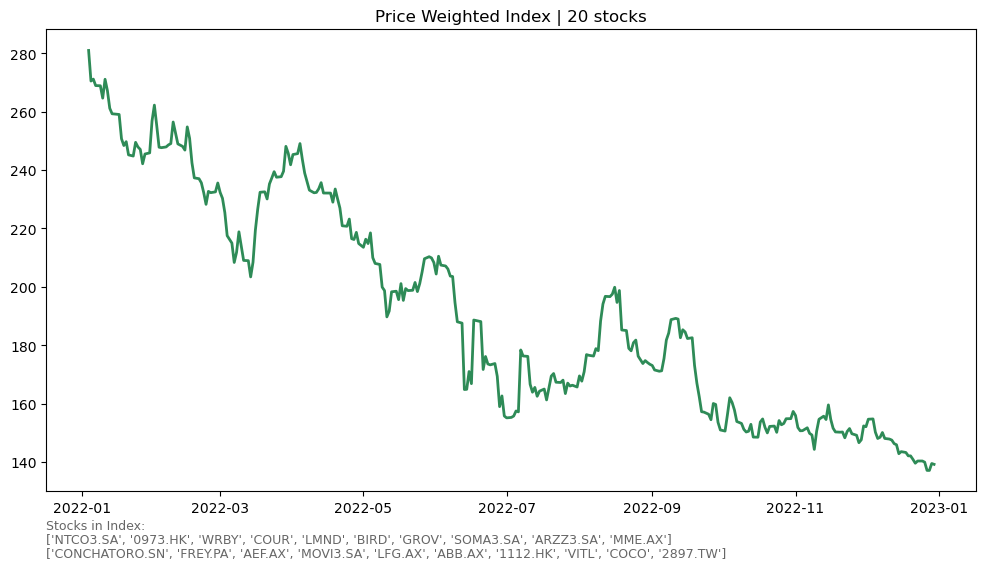

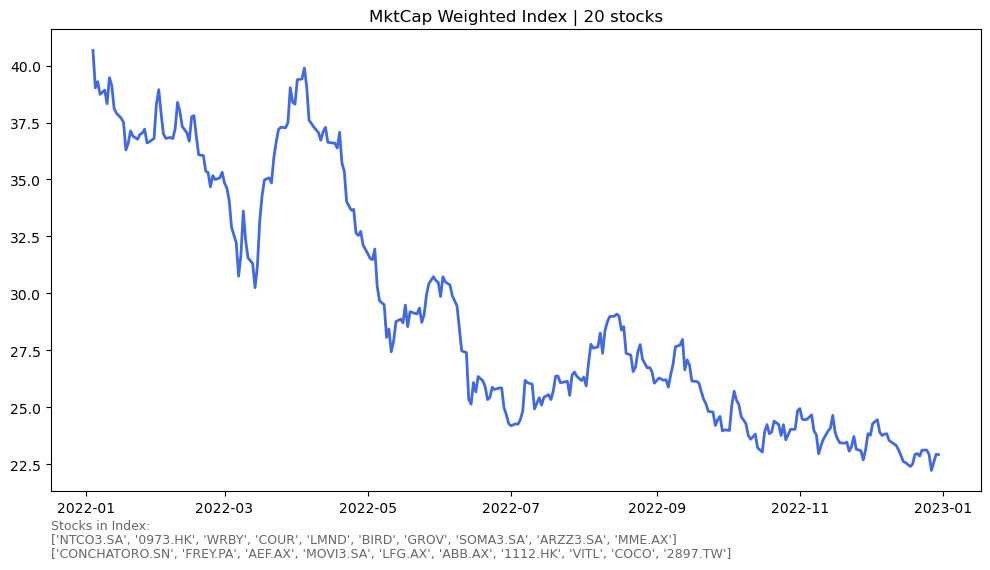

,NTCO3.SA_px_USD,0973.HK_px_USD,WRBY_px_USD,COUR_px_USD,LMND_px_USD,BIRD_px_USD,GROV_px_USD,SOMA3.SA_px_USD,ARZZ3.SA_px_USD,MME.AX_px_USD,...,FREY.PA_px_USD,AEF.AX_px_USD,MOVI3.SA_px_USD,LFG.AX_px_USD,ABB.AX_px_USD,1112.HK_px_USD,VITL_px_USD,COCO_px_USD,2897.TW_px_USD,Index
2022-01-04,3.914689,3.977998,44.080002,25.000000,39.029999,15.59,49.450001,1.991196,11.701577,1.535003,...,32.907552,9.541018,2.389050,3.245157,3.330666,1.363770,18.180000,12.00,0.268931,280.916943
2022-01-05,3.713087,3.964855,41.660000,24.010000,36.790001,13.57,49.700001,1.791267,11.077427,1.516515,...,32.995116,8.942125,2.214387,3.224879,3.040251,1.424884,17.570000,11.49,0.269151,270.436253
2022-01-06,3.687638,4.030334,42.389999,23.410000,35.330002,15.23,49.599998,1.854434,11.330111,1.482827,...,32.946883,8.786915,2.216285,3.198941,3.194884,1.394344,18.290001,10.96,0.269355,271.095188
2022-01-07,3.598662,4.030334,39.709999,23.219999,37.139999,13.94,49.700001,1.826764,11.335986,1.482827,...,32.946883,8.786915,2.191904,3.198941,3.194884,1.394344,18.510000,10.91,0.269355,268.885628
2022-01-09,3.598662,4.168364,39.709999,23.219999,37.139999,13.94,49.700001,1.826764,11.335986,1.457235,...,32.910492,8.603711,2.191904,3.234819,3.180075,1.419804,18.510000,10.91,0.270424,268.826069


,NTCO3.SA_MktCap_USD,0973.HK_MktCap_USD,WRBY_MktCap_USD,COUR_MktCap_USD,LMND_MktCap_USD,BIRD_MktCap_USD,GROV_MktCap_USD,SOMA3.SA_MktCap_USD,ARZZ3.SA_MktCap_USD,MME.AX_MktCap_USD,...,FREY.PA_MktCap_USD,AEF.AX_MktCap_USD,MOVI3.SA_MktCap_USD,LFG.AX_MktCap_USD,ABB.AX_MktCap_USD,1112.HK_MktCap_USD,VITL_MktCap_USD,COCO_MktCap_USD,2897.TW_MktCap_USD,Index
2022-01-04,5.416676e+09,5.856290e+09,5.208625e+09,3.933100e+09,2.753453e+09,2.419396e+09,1.888105e+09,1.580518e+09,1.315515e+09,1.228122e+09,...,1.041975e+09,1.076055e+09,8.680708e+08,9.858918e+08,9.831627e+08,8.803967e+08,7.598477e+08,6.831516e+08,7.305438e+08,40.665707
2022-01-05,5.137724e+09,5.836940e+09,4.922671e+09,3.777349e+09,2.595428e+09,2.105915e+09,1.897650e+09,1.421824e+09,1.245347e+09,1.213330e+09,...,1.044747e+09,1.008511e+09,8.046065e+08,9.797311e+08,8.974365e+08,9.198493e+08,7.343522e+08,6.541176e+08,7.311417e+08,39.024153
2022-01-06,5.102511e+09,5.933337e+09,5.008929e+09,3.682955e+09,2.492429e+09,2.363528e+09,1.893832e+09,1.471963e+09,1.273754e+09,1.186377e+09,...,1.043220e+09,9.910058e+08,8.052959e+08,9.718510e+08,9.430817e+08,9.001342e+08,7.644452e+08,6.239451e+08,7.316935e+08,39.294600
2022-01-07,4.979397e+09,5.933337e+09,4.692253e+09,3.653063e+09,2.620119e+09,2.163334e+09,1.897650e+09,1.450000e+09,1.274414e+09,1.186377e+09,...,1.043220e+09,9.910058e+08,7.964371e+08,9.718510e+08,9.430817e+08,9.001342e+08,7.736403e+08,6.210987e+08,7.316935e+08,38.736581
2022-01-09,4.979397e+09,6.136540e+09,4.692253e+09,3.653063e+09,2.620119e+09,2.163334e+09,1.897650e+09,1.450000e+09,1.274414e+09,1.165902e+09,...,1.042068e+09,9.703437e+08,7.964371e+08,9.827509e+08,9.387103e+08,9.165699e+08,7.736403e+08,6.210987e+08,7.345980e+08,38.923363


In [60]:
price_wgt_index = calc_px_weighted_index(daily_px_USD, divisor = 1, show_chart=True)
mktcap_wgt_index = calc_MC_weighted_index (daily_MC_USD, divisor = 1000000000, show_chart=True)

display(price_wgt_index.head())
display(mktcap_wgt_index.head())


In [61]:

if download:
    price_wgt_index.to_csv("PriceWgt_Index.csv")
    mktcap_wgt_index.to_csv("MarketCap_of_Index.csv")

In [62]:
def combine_norm_and_benchmark(px_df, mc_df):
    
    combined_df = pd.concat([px_df['Index'],mc_df['Index']], axis=1)
    combined_df.columns = ['Price Weighted Index', "Mkt Cap Weighted Index"]
    
    # Add S&P
    spx_object = yf.Ticker("^GSPC")
    spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
    spx = spx[['Close']]
    spx.columns = ['SPX']
    spx.index = pd.to_datetime(spx.index).date
    
    # Add Russell 2000
    ru2000_object = yf.Ticker("^RUT")
    ru2000 = pd.DataFrame.from_dict(ru2000_object.history(start=s, end=e, interval = "1d"))
    ru2000 = ru2000[['Close']]
    ru2000.columns = ['RU2000']
    ru2000.index = pd.to_datetime(ru2000.index).date
    
    # Add DJ Sustainability
    #DJsus_object = pd.read_csv("DJSus_history.csv")
    #display(DJsus_object.head())
    #DJsus_object.index = pd.to_datetime(DJsus_object['Date'])
    #DJsus_object.drop(['Date'], axis=1, inplace=True)
    #DJsus_object.index = pd.to_datetime(DJsus_object.index).date
    #DJ_Sus = DJsus_object.copy()

    combined_df = pd.concat([combined_df, spx, ru2000], axis=1)
    
    combined_df = combined_df.ffill()
    display(combined_df.head())

    combined_df = combined_df.div(combined_df.iloc[0])
    return combined_df


In [63]:
## Contain SPX, RU2000, DJ Sus separately for graphing

spx_object = yf.Ticker("^GSPC")
spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
spx = spx[['Close']]
spx.columns = ['SPX']
spx.index = pd.to_datetime(spx.index).date


ru2000_object = yf.Ticker("^RUT")
ru2000 = pd.DataFrame.from_dict(ru2000_object.history(start=s, end=e, interval = "1d"))
ru2000 = ru2000[['Close']]
ru2000.columns = ['RU2000']
ru2000.index = pd.to_datetime(ru2000.index).date

'''
DJsus_object = pd.read_csv("DJSus_history.csv")
#display(DJsus_object.head())
DJsus_object.index = pd.to_datetime(DJsus_object['Date'])
DJsus_object.drop(['Date'], axis=1, inplace=True)
DJsus_object.index = pd.to_datetime(DJsus_object.index).date
#display(DJsus_object.head())
'''

'\nDJsus_object = pd.read_csv("DJSus_history.csv")\n#display(DJsus_object.head())\nDJsus_object.index = pd.to_datetime(DJsus_object[\'Date\'])\nDJsus_object.drop([\'Date\'], axis=1, inplace=True)\nDJsus_object.index = pd.to_datetime(DJsus_object.index).date\n#display(DJsus_object.head())\n'

In [64]:
index_comparison_df = combine_norm_and_benchmark(price_wgt_index, mktcap_wgt_index)

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,280.916943,40.665707,4793.540039,2268.870117
2022-01-05,270.436253,39.024153,4700.580078,2194.000000
2022-01-06,271.095188,39.294600,4696.049805,2206.370117
2022-01-07,268.885628,38.736581,4677.029785,2179.810059
2022-01-09,268.826069,38.923363,4677.029785,2179.810059


In [65]:
index_comparison_df.head(5)

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,1.000000,1.000000,1.000000,1.000000
2022-01-05,0.962691,0.959633,0.980607,0.967001
2022-01-06,0.965037,0.966283,0.979662,0.972453
2022-01-07,0.957171,0.952561,0.975694,0.960747
2022-01-09,0.956959,0.957154,0.975694,0.960747


In [66]:
index_comparison_df.sort_index(inplace=True)

## Preview and adjust dates if needed

In [67]:
display(index_comparison_df.head(5))

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,1.000000,1.000000,1.000000,1.000000
2022-01-05,0.962691,0.959633,0.980607,0.967001
2022-01-06,0.965037,0.966283,0.979662,0.972453
2022-01-07,0.957171,0.952561,0.975694,0.960747
2022-01-09,0.956959,0.957154,0.975694,0.960747


In [68]:
adjust = 0

In [69]:
if adjust > 0:
    index_comparison_df = index_comparison_df.iloc[adjust:,:]
display(index_comparison_df.head(5))

if download:
    index_comparison_df.to_csv("Index_Comparison.csv")

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,1.000000,1.000000,1.000000,1.000000
2022-01-05,0.962691,0.959633,0.980607,0.967001
2022-01-06,0.965037,0.966283,0.979662,0.972453
2022-01-07,0.957171,0.952561,0.975694,0.960747
2022-01-09,0.956959,0.957154,0.975694,0.960747


### Graph Indices

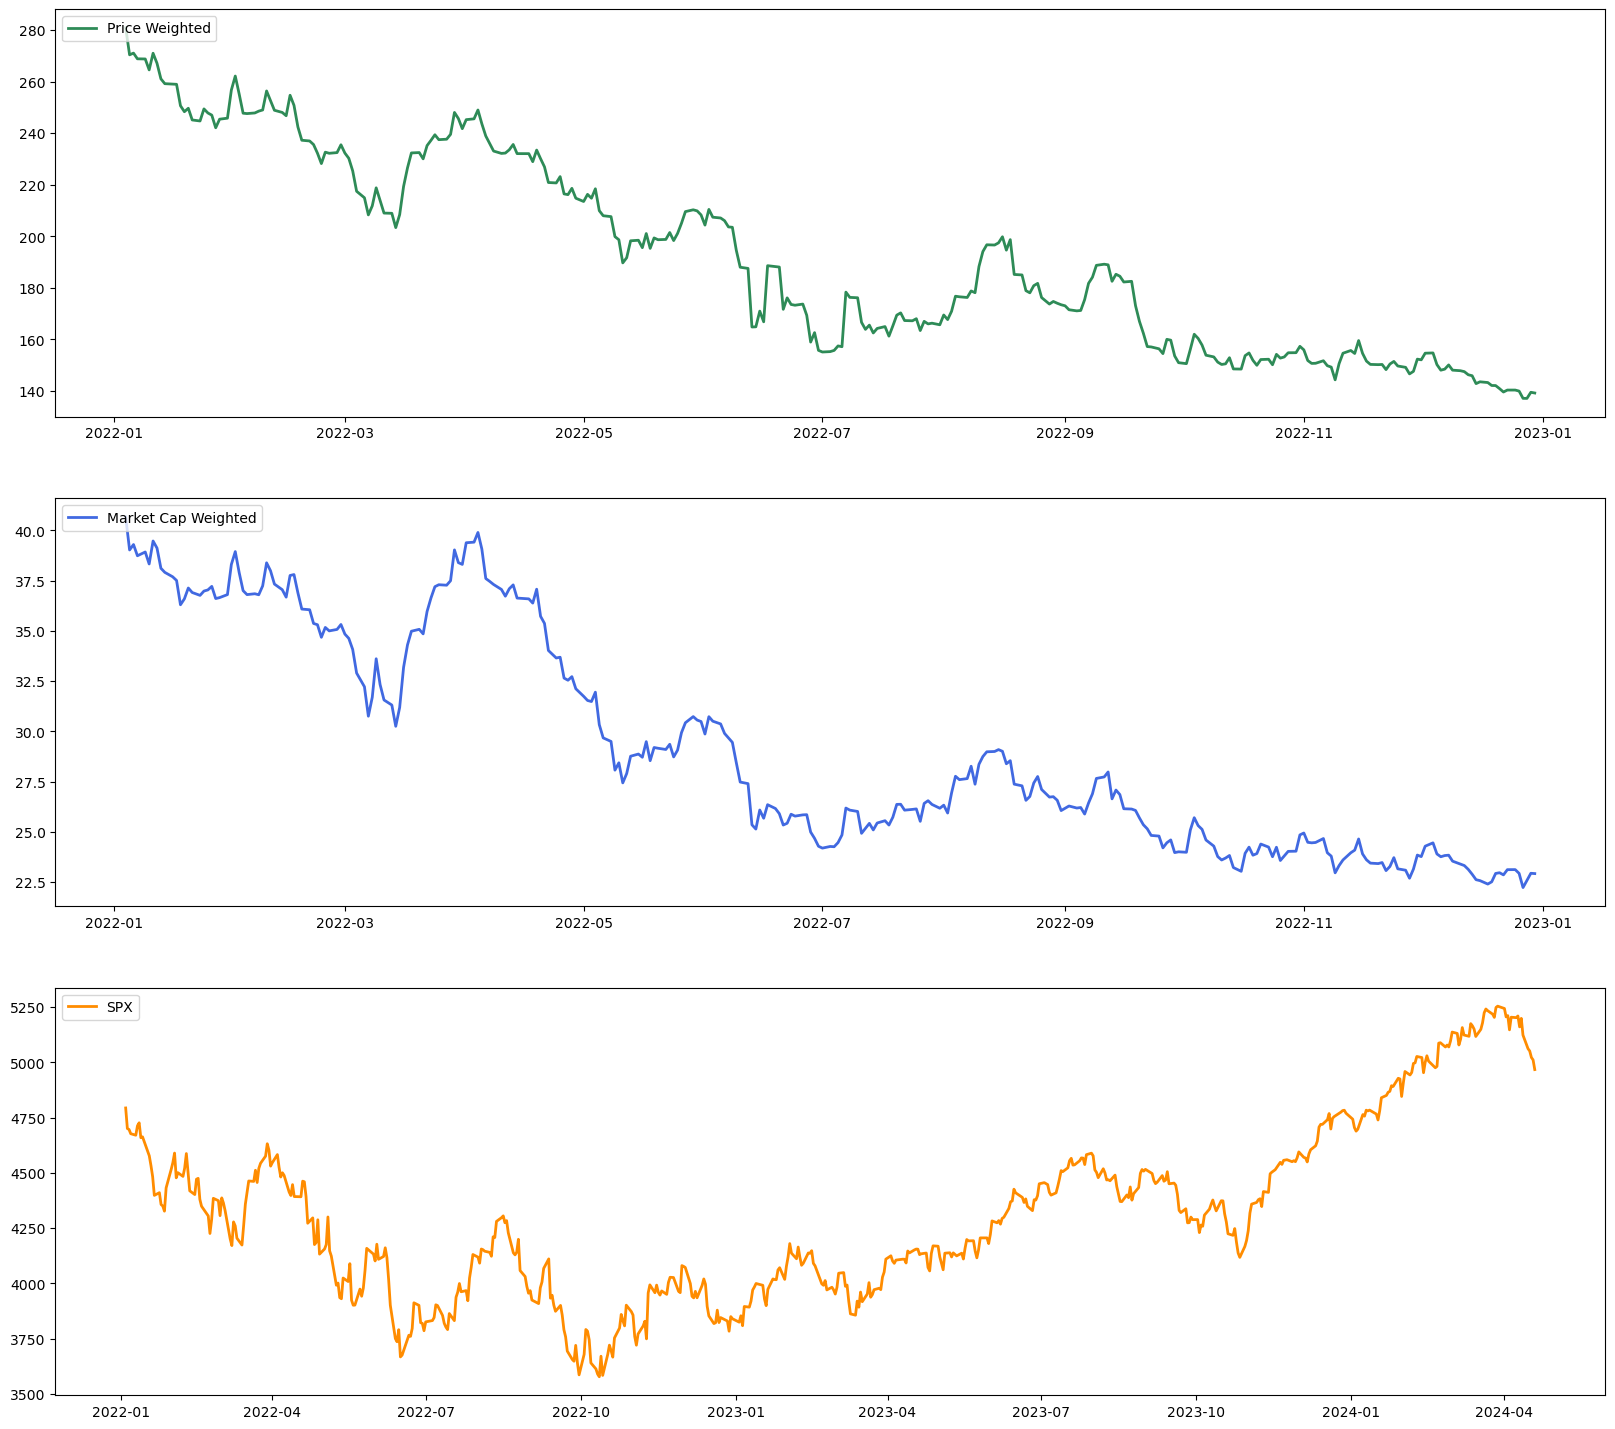

In [70]:
## Graph Separately
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
ax0.plot(price_wgt_index['Index'], color = 'seagreen', linewidth=2, label = 'Price Weighted')
ax0.legend(loc=2)
ax1.plot(mktcap_wgt_index['Index'], color = 'royalblue', linewidth=2,label='Market Cap Weighted')
ax1.legend(loc=2)
ax2.plot(spx, color='darkorange', linewidth=2, label = 'SPX')
ax2.legend(loc=2)
plt.show()

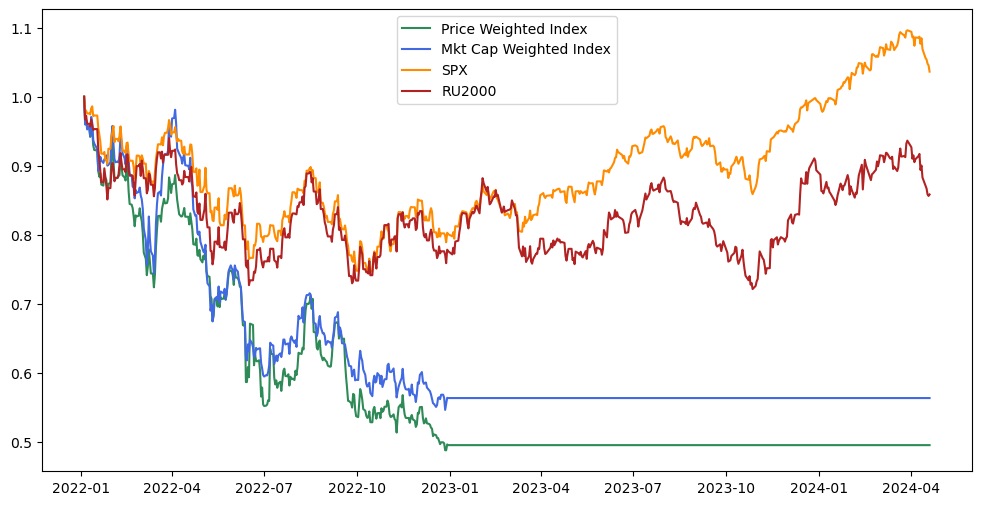

In [71]:
## Graph Together
#fig, ax = plt.subplots(figsize = (12,6))
index_comparison_df.plot(figsize = (12,6),
                         color = ['seagreen', 'royalblue', 'darkorange', 'firebrick', 'goldenrod'])

plt.show()

In [72]:
# Export Index:
#index_comparison_df.to_csv("Index_Comparison.csv")

### Visualize Characteristics

In [73]:
classify_all = stock_data_filtered.copy()
classify_index = stock_index.copy()
print(classify_all.shape, classify_index.shape)

(54, 14) (20, 14)


In [74]:
classify_index['country'].value_counts()

country
United States    7
Brazil           4
Australia        4
Luxembourg       1
Chile            1
France           1
Hong Kong        1
Taiwan           1
Name: count, dtype: int64

In [75]:
classify_index

,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,beginningUSDExchangeRate,2022-01-04,beginningCloseUSD,beginningMarketCapUSD
Ticker,,,,,,,,,,,,,,
NTCO3.SA,GRUPO NATURAON NM,Natura &Co Holding S.A.,Brazil,BRL,16.88,1383680000,23107457024,Household & Personal Products,Consumer Defensive,https://www.naturaeco.com,4.923979,22.226015,4.513832,6245699374.638916
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1472169984,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.815320,31.003922,3.967070,5840201377.746689
WRBY,Warby Parker Inc.,Warby Parker Inc.,United States,USD,12.92,118163000,1478219136,Medical Instruments & Supplies,Healthcare,https://www.warbyparker.com,1.000000,44.080002,44.080002,5208625256.362915
COUR,"Coursera, Inc.","Coursera, Inc.",United States,USD,11.97,157324000,1864682752,Education & Training Services,Consumer Defensive,https://www.coursera.org,1.000000,25.000000,25.000000,3933100000.0
LMND,"Lemonade, Inc.","Lemonade, Inc.",United States,USD,17.95,70547104,1260568576,Insurance - Property & Casualty,Financial Services,https://www.lemonade.com,1.000000,39.029999,39.029999,2753453383.00293
BIRD,"Allbirds, Inc.","Allbirds, Inc.",United States,USD,0.6126,155188992,98467416,Apparel Retail,Consumer Cyclical,https://www.allbirds.com,1.000000,15.590000,15.590000,2419396408.959961
GROV,"Grove Collaborative Holdings, I","Grove Collaborative Holdings, Inc.",United States,USD,1.57,38182100,61855004,Household & Personal Products,Consumer Defensive,https://www.grove.co,1.000000,49.450001,49.450001,1888104874.13063
SOMA3.SA,GRUPO SOMA ON NM,Grupo de Moda Soma S.A.,Brazil,BRL,6.11,793753024,4810499072,Apparel Retail,Consumer Cyclical,https://www.somagrupo.com.br,4.923979,11.305203,2.295949,1822416264.507435
ARZZ3.SA,AREZZO CO ON NM,Arezzo Indústria e Comércio S.A.,Brazil,BRL,52.03,112422000,5833061888,Footwear & Accessories,Consumer Cyclical,https://ri.arezzoco.com.br,4.923979,66.436813,13.492505,1516854444.533318


In [76]:
def visualize_groups (df_all, df_some):
    # by sector:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_all['sector'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("steelblue", n_slices, reverse=True)
    
    ax.pie(df_all['sector'].value_counts(), labels=df_all['sector'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Sectors in Public B-Corp Universe')
    plt.show()
    

    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_some['sector'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("steelblue", n_slices, reverse=True)
    
    ax.pie(df_some['sector'].value_counts(), labels=df_some['sector'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Sectors in Top 20 Index')
    plt.show()  
    

    # by industry:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_all['industry'].value_counts().index))
    cmap = sns.light_palette("maroon", n_slices, reverse=True)
    
    ax.pie(df_all['industry'].value_counts(), labels=df_all['industry'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'xx-small'}, colors = cmap)
    plt.title('Industries in Public B-Corp Universe')
    plt.show()
    


    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_some['industry'].value_counts().index))
    cmap = sns.light_palette("maroon", n_slices, reverse=True)
    
    ax.pie(df_some['industry'].value_counts(), labels=df_some['industry'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'xx-small'}, colors = cmap)
    plt.title('Industries in Top 20 Index')
    plt.show()   
  
    
    # by country:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_all['country'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("seagreen", n_slices, reverse=True)
    
    ax.pie(df_all['country'].value_counts(), labels=df_all['country'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Countries in Public B-Corp Universe')
    plt.show()
    
    # by country:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_some['country'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("seagreen", n_slices, reverse=True)
    
    ax.pie(df_some['country'].value_counts(), labels=df_some['country'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Countries in Top 20 Index')
    plt.show()


    
    # by currency:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_all['currency'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("goldenrod", n_slices, reverse=True)
    
    ax.pie(df_all['currency'].value_counts(), labels=df_all['currency'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Currencies in Public B-Corp Universe')
    plt.show()
    
    # by currency:
    fig, ax = plt.subplots(figsize = (8,6))
    
    n_slices = len(list(df_some['currency'].value_counts().index))
    #cmap = sns.color_palette("Blues", n_slices)
    cmap = sns.light_palette("goldenrod", n_slices, reverse=True)
    
    ax.pie(df_some['currency'].value_counts(), labels=df_some['currency'].value_counts().index, autopct='%1.1f%%',
          pctdistance=.8, textprops={'size': 'smaller'}, colors = cmap)
    plt.title('Currencies in Top 20 Index')
    plt.show()

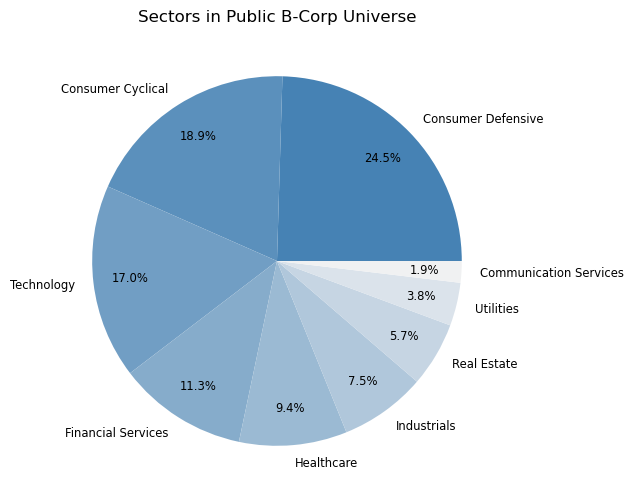

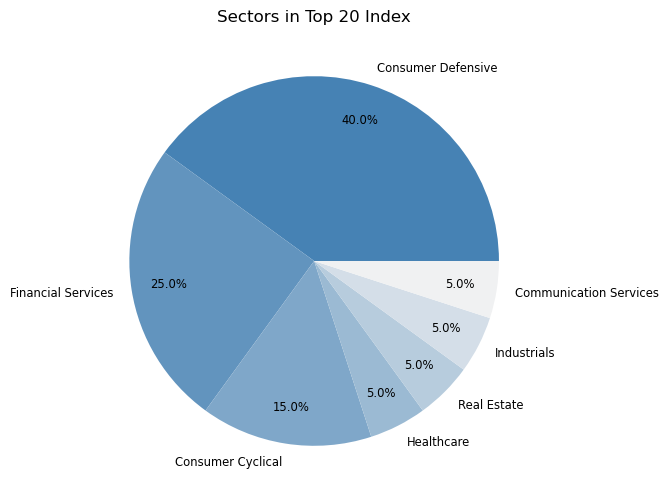

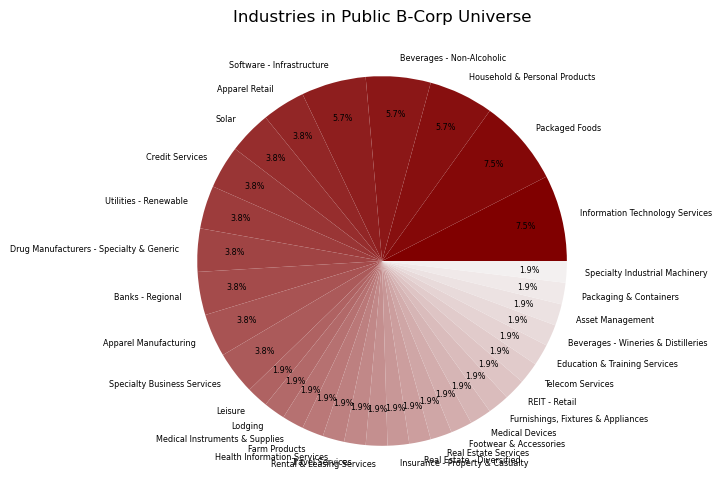

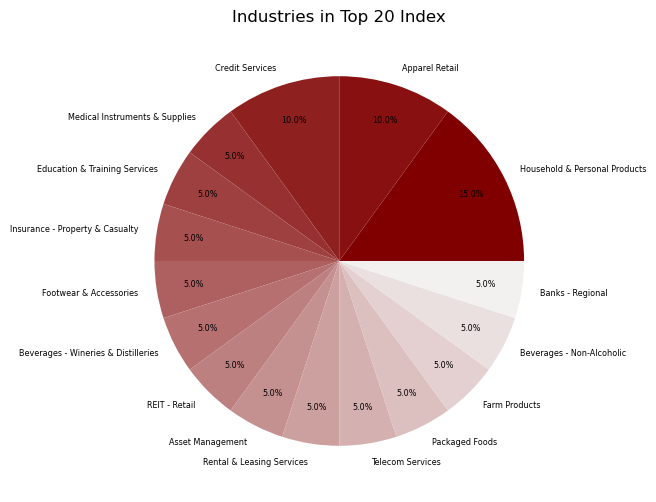

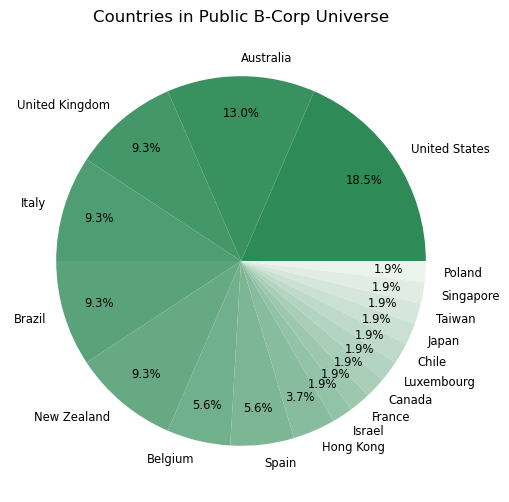

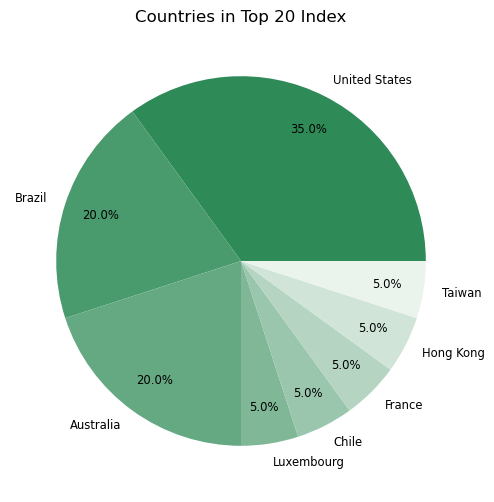

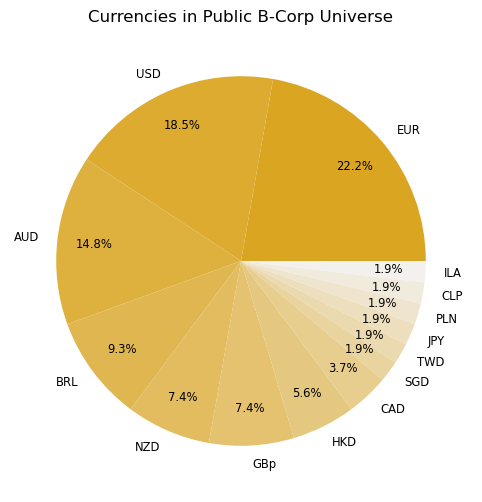

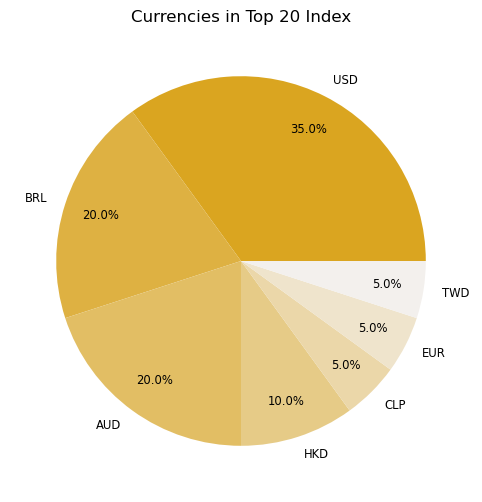

In [77]:
visualize_groups(classify_all, classify_index)

In [78]:
print(stock_index.shape)

(20, 14)


In [79]:
print(price_wgt_index.shape)
display(price_wgt_index)

(309, 21)


,NTCO3.SA_px_USD,0973.HK_px_USD,WRBY_px_USD,COUR_px_USD,LMND_px_USD,BIRD_px_USD,GROV_px_USD,SOMA3.SA_px_USD,ARZZ3.SA_px_USD,MME.AX_px_USD,...,FREY.PA_px_USD,AEF.AX_px_USD,MOVI3.SA_px_USD,LFG.AX_px_USD,ABB.AX_px_USD,1112.HK_px_USD,VITL_px_USD,COCO_px_USD,2897.TW_px_USD,Index
2022-01-04,3.914689,3.977998,44.080002,25.000000,39.029999,15.590,49.450001,1.991196,11.701577,1.535003,...,32.907552,9.541018,2.389050,3.245157,3.330666,1.363770,18.180000,12.00,0.268931,280.916943
2022-01-05,3.713087,3.964855,41.660000,24.010000,36.790001,13.570,49.700001,1.791267,11.077427,1.516515,...,32.995116,8.942125,2.214387,3.224879,3.040251,1.424884,17.570000,11.49,0.269151,270.436253
2022-01-06,3.687638,4.030334,42.389999,23.410000,35.330002,15.230,49.599998,1.854434,11.330111,1.482827,...,32.946883,8.786915,2.216285,3.198941,3.194884,1.394344,18.290001,10.96,0.269355,271.095188
2022-01-07,3.598662,4.030334,39.709999,23.219999,37.139999,13.940,49.700001,1.826764,11.335986,1.482827,...,32.946883,8.786915,2.191904,3.198941,3.194884,1.394344,18.510000,10.91,0.269355,268.885628
2022-01-09,3.598662,4.168364,39.709999,23.219999,37.139999,13.940,49.700001,1.826764,11.335986,1.457235,...,32.910492,8.603711,2.191904,3.234819,3.180075,1.419804,18.510000,10.91,0.270424,268.826069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.987802,3.007040,13.530000,12.050000,14.400000,2.390,1.200000,1.930785,14.617724,0.176914,...,33.757023,2.630098,1.492457,2.325910,1.735760,2.139557,15.480000,13.67,0.261927,139.947396
2022-12-27,1.862088,3.055792,12.990000,11.390000,13.410000,2.270,1.385000,1.825134,14.046209,0.171561,...,33.747328,2.551886,1.367390,2.411662,1.729068,1.807932,15.710000,13.95,0.260648,137.132625
2022-12-28,2.006002,3.058085,13.010000,11.220000,12.910000,2.245,1.385000,1.918353,14.503129,0.165301,...,33.721502,2.539339,1.475093,2.375317,1.720479,1.932919,15.910000,13.56,0.259742,137.113172
2022-12-29,2.027185,3.089908,13.750000,11.760000,13.840000,2.370,1.490000,1.895074,14.375302,0.165742,...,33.825764,2.572574,1.425351,2.468267,1.765664,1.980533,15.270000,13.97,0.263200,139.483942


In [80]:
print(mktcap_wgt_index.shape)
display(mktcap_wgt_index)

(309, 21)


,NTCO3.SA_MktCap_USD,0973.HK_MktCap_USD,WRBY_MktCap_USD,COUR_MktCap_USD,LMND_MktCap_USD,BIRD_MktCap_USD,GROV_MktCap_USD,SOMA3.SA_MktCap_USD,ARZZ3.SA_MktCap_USD,MME.AX_MktCap_USD,...,FREY.PA_MktCap_USD,AEF.AX_MktCap_USD,MOVI3.SA_MktCap_USD,LFG.AX_MktCap_USD,ABB.AX_MktCap_USD,1112.HK_MktCap_USD,VITL_MktCap_USD,COCO_MktCap_USD,2897.TW_MktCap_USD,Index
2022-01-04,5.416676e+09,5.856290e+09,5.208625e+09,3.933100e+09,2.753453e+09,2.419396e+09,1.888105e+09,1.580518e+09,1.315515e+09,1.228122e+09,...,1.041975e+09,1.076055e+09,8.680708e+08,9.858918e+08,9.831627e+08,8.803967e+08,7.598477e+08,6.831516e+08,7.305438e+08,40.665707
2022-01-05,5.137724e+09,5.836940e+09,4.922671e+09,3.777349e+09,2.595428e+09,2.105915e+09,1.897650e+09,1.421824e+09,1.245347e+09,1.213330e+09,...,1.044747e+09,1.008511e+09,8.046065e+08,9.797311e+08,8.974365e+08,9.198493e+08,7.343522e+08,6.541176e+08,7.311417e+08,39.024153
2022-01-06,5.102511e+09,5.933337e+09,5.008929e+09,3.682955e+09,2.492429e+09,2.363528e+09,1.893832e+09,1.471963e+09,1.273754e+09,1.186377e+09,...,1.043220e+09,9.910058e+08,8.052959e+08,9.718510e+08,9.430817e+08,9.001342e+08,7.644452e+08,6.239451e+08,7.316935e+08,39.294600
2022-01-07,4.979397e+09,5.933337e+09,4.692253e+09,3.653063e+09,2.620119e+09,2.163334e+09,1.897650e+09,1.450000e+09,1.274414e+09,1.186377e+09,...,1.043220e+09,9.910058e+08,7.964371e+08,9.718510e+08,9.430817e+08,9.001342e+08,7.736403e+08,6.210987e+08,7.316935e+08,38.736581
2022-01-09,4.979397e+09,6.136540e+09,4.692253e+09,3.653063e+09,2.620119e+09,2.163334e+09,1.897650e+09,1.450000e+09,1.274414e+09,1.165902e+09,...,1.042068e+09,9.703437e+08,7.964371e+08,9.827509e+08,9.387103e+08,9.165699e+08,7.736403e+08,6.210987e+08,7.345980e+08,38.923363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2.750482e+09,4.426874e+09,1.598745e+09,1.895754e+09,1.015878e+09,3.709017e+08,4.581852e+07,1.532567e+09,1.643354e+09,1.415450e+08,...,1.068872e+09,2.966277e+08,5.422903e+08,7.066206e+08,5.123703e+08,1.381215e+09,6.469990e+08,7.782235e+08,7.115168e+08,22.933035
2022-12-27,2.576535e+09,4.498646e+09,1.534937e+09,1.791920e+09,9.460367e+08,3.522790e+08,5.288221e+07,1.448706e+09,1.579103e+09,1.372623e+08,...,1.068565e+09,2.878068e+08,4.968465e+08,7.326727e+08,5.103949e+08,1.167130e+09,6.566120e+08,7.941637e+08,7.080414e+08,22.226659
2022-12-28,2.775665e+09,4.502021e+09,1.537301e+09,1.765175e+09,9.107631e+08,3.483993e+08,5.288221e+07,1.522698e+09,1.630471e+09,1.322537e+08,...,1.067748e+09,2.863917e+08,5.359809e+08,7.216308e+08,5.078597e+08,1.247817e+09,6.649712e+08,7.719613e+08,7.055817e+08,22.578886
2022-12-29,2.804976e+09,4.548869e+09,1.624741e+09,1.850130e+09,9.763719e+08,3.677979e+08,5.689133e+07,1.504221e+09,1.616100e+09,1.326069e+08,...,1.071049e+09,2.901401e+08,5.179069e+08,7.498693e+08,5.211976e+08,1.278555e+09,6.382219e+08,7.953023e+08,7.149754e+08,22.937447


## Reconstitute:

In [81]:
df22 = stock_data_filtered.copy()

In [82]:
def reconstitute(df, recon_date):

    # Confirm Implied Shares Outstanding for Mkt Cap calculation:    
    df['impliedSharesOutstanding'] = df['marketCap'] / df['previousClose']
    
    reprice = get_starting_price(df, start = recon_date)
    
    recon_px = reprice.filter(like=recon_date, axis=0).T
    recon_px.columns = [str(recon_date)]
    
    exch_data_recast = get_rates(date=recon_date)
    currency_dict_recast = currency_dict.copy()
    
    # Revise currency translation:
    for symbol, rate in exch_data_recast['rates'].items():
        for key in currency_dict_recast.keys():
            if symbol == key:
                currency_dict_recast[key][1] = rate
                
    # Revise currency map:
    currency_map_rev = {symbol:rate
                       for symbol, name in currency_dict_recast.items()
                       for rate in name}
    
    col = 'USDExchRate'+str(recon_date)
    df[col] = df['currency'].map(currency_map_rev)
    df = df.join(recon_px)
    
    
    col2 = 'CloseUSD'+str(recon_date)
    df[col2] = df[recon_date] / df[col]
    
    col3='MarketCapUSD'+str(recon_date)
    df[col3] = df[col2] * df['impliedSharesOutstanding']
    
    
    return df

In [83]:
df23 = reconstitute(df22, recon_date = '2023-01-03') 
display(df23.head(20))

df24 = reconstitute(df23, recon_date = '2024-01-02') 
display(df24.head(20))

,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,beginningUSDExchangeRate,2022-01-04,beginningCloseUSD,beginningMarketCapUSD,USDExchRate2023-01-03,2023-01-03,CloseUSD2023-01-03,MarketCapUSD2023-01-03
Ticker,,,,,,,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1419248874.248366,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.815320,31.003922,3.967070,5840201377.746689,7.813450,25.320807,3.240669,4599316067.148751
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.22,649351013.69863,6636367360,Packaged Foods,Consumer Defensive,https://www.hh.global,7.815320,10.629018,1.360023,877978078.233685,7.813450,15.252042,1.952024,1267548754.34737
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.87,639100027.586207,556017024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.815320,0.305428,0.039081,25242197.742691,7.813450,0.292466,0.037431,23922254.927163
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.08,115845000.0,9267600,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.326405,0.110000,0.082931,9607133.515744,1.345415,0.159000,0.118179,13690463.054849
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.88,2749463630.76923,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,30.894018,7.403813,0.239652,651007444.449265,30.665300,8.040440,0.262200,720909179.79945
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1583.0,42183304.166772,66776170496,Specialty Business Services,Industrials,https://www.sigmaxyz.com,142.156502,1166.818604,8.207986,354595673.267619,131.253499,1169.781372,8.912382,375953736.87269
ABB.AX,AUSSIEBAND FPO [ABB],Aussie Broadband Limited,Australia,AUD,3.61,300091106.925208,1083328896,Telecom Services,Communication Services,https://www.aussiebroadband.com.au,1.478066,4.600000,3.112175,918667322.737256,1.486768,2.690000,1.809294,542952965.627562
AEF.AX,A ETHICAL FPO [AEF],Australian Ethical Investment Limited,Australia,AUD,4.89,112781991.002045,551503936,Asset Management,Financial Services,https://www.australianethical.com.au,1.478066,13.177149,8.915129,1005466060.447263,1.486768,4.086268,2.748423,309972662.150564
ALQP.PA,QUADPACK,"Quadpack Industries, S.A.",Spain,EUR,13.9,4391246.043165,61038320,Packaging & Containers,Consumer Cyclical,https://www.quadpack.com,0.913960,23.799999,26.040526,114112970.65156,0.948180,19.100000,20.143855,88456623.320032


,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,...,beginningCloseUSD,beginningMarketCapUSD,USDExchRate2023-01-03,2023-01-03,CloseUSD2023-01-03,MarketCapUSD2023-01-03,USDExchRate2024-01-02,2024-01-02,CloseUSD2024-01-02,MarketCapUSD2024-01-02
Ticker,,,,,,,,,,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,30.6,1419248874.248366,43429015552,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,...,3.967070,5840201377.746689,7.813450,25.320807,3.240669,4599316067.148751,7.815320,21.850000,2.795791,3967923059.28961
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.22,649351013.69863,6636367360,Packaged Foods,Consumer Defensive,https://www.hh.global,...,1.360023,877978078.233685,7.813450,15.252042,1.952024,1267548754.34737,7.815320,12.240000,1.566155,1016984110.57341
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.87,639100027.586207,556017024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,...,0.039081,25242197.742691,7.813450,0.292466,0.037431,23922254.927163,7.815320,0.806804,0.103234,65976637.641731
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.08,115845000.0,9267600,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,...,0.082931,9607133.515744,1.345415,0.159000,0.118179,13690463.054849,1.326405,0.076000,0.057298,6637655.706137
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.88,2749463630.76923,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,...,0.239652,651007444.449265,30.665300,8.040440,0.262200,720909179.79945,30.894018,9.920000,0.321098,882846621.860523
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1583.0,42183304.166772,66776170496,Specialty Business Services,Industrials,https://www.sigmaxyz.com,...,8.207986,354595673.267619,131.253499,1169.781372,8.912382,375953736.87269,142.156502,NaN,NaN,NaN
ABB.AX,AUSSIEBAND FPO [ABB],Aussie Broadband Limited,Australia,AUD,3.61,300091106.925208,1083328896,Telecom Services,Communication Services,https://www.aussiebroadband.com.au,...,3.112175,918667322.737256,1.486768,2.690000,1.809294,542952965.627562,1.478066,3.790000,2.564162,769482069.000282
AEF.AX,A ETHICAL FPO [AEF],Australian Ethical Investment Limited,Australia,AUD,4.89,112781991.002045,551503936,Asset Management,Financial Services,https://www.australianethical.com.au,...,8.915129,1005466060.447263,1.486768,4.086268,2.748423,309972662.150564,1.478066,5.189354,3.510908,395967209.645114
ALQP.PA,QUADPACK,"Quadpack Industries, S.A.",Spain,EUR,13.9,4391246.043165,61038320,Packaging & Containers,Consumer Cyclical,https://www.quadpack.com,...,26.040526,114112970.65156,0.948180,19.100000,20.143855,88456623.320032,0.913960,19.900000,21.773381,95612274.698964


In [166]:
df23.shape

(53, 19)

In [84]:
#df24.to_csv('reconst_test.csv')

In [151]:
def construct_index_with_recon (df, cutoff=20, start_date = '2022-01-04', end_date = '2022-12-31', pw_divisor = 1, mw_divisor=1000000000):
    today = str(dt.today())
    if today >'2024-12-31':
        print("Add a Year!")
    
    # Clean up errant stock:
    if 'MLMFI.PA' in df.index:
        df.drop('MLMFI.PA', axis=0, inplace=True)

    
    if str(start_date[0:4]) == "2022":
        col = 'beginningMarketCapUSD'
    else:
        col = 'MarketCapUSD' + start_date
    index = filter_index(df, size=False, num=True, num_thresh=cutoff, col = col)
    
    #display(index.head())
    
    assert index.shape[0] == cutoff
    
    prices = get_price_history(index, start_date, end= end_date)
    price_and_info, index_currencies = get_country_info(prices, index)
    
    
    # Set stock universe
    stock_universe = list(index.T.columns)
    
    #Get historical exchange rates
    filename = "daily_rates_" + str(start_date[0:4] + ".csv")
    daily_rates_df, _ = load_rates(filename)

    daily_price_and_info_df = price_and_info.join(daily_rates_df)
    
    # Add marketcap:
    daily_price_MC_usd_all = convert_price_mktcap_USD(daily_price_and_info_df, stock_universe) 
    
    # Refine DF INTO USD and calculate PW and MW indicies:
    daily_info_usd, daily_px_USD, daily_MC_USD = get_df_in_USD(daily_price_MC_usd_all)
    
  
    price_wgt_index = calc_px_weighted_index(daily_px_USD, divisor = pw_divisor, show_chart=False)
    
    #display(price_wgt_index.head())
    #display(price_wgt_index.tail())
    
    
    mktcap_wgt_index = calc_MC_weighted_index (daily_MC_USD, divisor = mw_divisor, show_chart=False)
    

    #filename2 = 'px_weighted_idx_details'+ str(start_date[0:4]) + ".csv"
    #price_wgt_index.to_csv(filename2)

    ending_index_pw = price_wgt_index.iloc[-1,-1]
    ending_index_mkt = mktcap_wgt_index.iloc[-1,-1]
    
    return price_wgt_index, ending_index_pw, mktcap_wgt_index, ending_index_mkt


In [152]:
def set_divisor (df0, df1, s0 = '2022-01-04', e0 = '2022-12-31', s1 = '2023-01-03', e1='2023-12-31', divisor=1):
    _, end0_pw, _, end0_mkt = construct_index_with_recon(df0, start_date = s0, end_date = e0, pw_divisor = divisor, mw_divisor = divisor)
    print("end year 0", end0_pw)
    px_wgt_1, _, mkt_cap1, _ = construct_index_with_recon(df1, start_date = s1, end_date = e1, pw_divisor = divisor, mw_divisor = divisor)
        
    
    beg1_pw = px_wgt_1.iloc[0,-1]
    print("beg year 1", beg1_pw)
    
    divisor1_pw = divisor * (beg1_pw/end0_pw)
    print("PW Divisor = ", divisor1_pw)
    
    beg1_mkt = mkt_cap1.iloc[0,-1]
    print("beg year 1", beg1_mkt)
    
    divisor1_mkt = divisor * (beg1_mkt/end0_mkt)
    print("Mkt Divisor = ", divisor1_mkt)
    
    return divisor1_pw, divisor1_mkt
    

### COMPILE PX WEIGHTED INDEX and GRAPH PERFORMANCE

In [154]:
price_wgt_index_22, _, _, _ = construct_index_with_recon(df22, pw_divisor = 1)
div1, _ = set_divisor(df22, df23, s0 = '2022-01-04', e0 = '2022-12-31', s1 = '2023-01-03', e1='2023-12-31', divisor=1)

price_wgt_index_23, _, _, _ = construct_index_with_recon(df23, start_date = '2023-01-03', end_date = '2023-12-31', pw_divisor = div1)
div2, _ = set_divisor(df23, df24, s0 = '2023-01-03', e0 = '2023-12-31', s1 = '2024-01-02', e1='2024-04-15', divisor = div1)

price_wgt_index_24, _, _, _ = construct_index_with_recon(df24, start_date = '2024-01-02', end_date = '2024-04-15', pw_divisor = div2)



end year 0 139.20564224317732
beg year 1 345.93662273774225
PW Divisor =  2.4850761590067454
beg year 1 23399125694.787884
Mkt Divisor =  1.0320122800414107
end year 0 277.44671134068966
beg year 1 281.8325442407114
PW Divisor =  2.5243598424375717
beg year 1 11279280156.533945
Mkt Divisor =  2.482250587709366


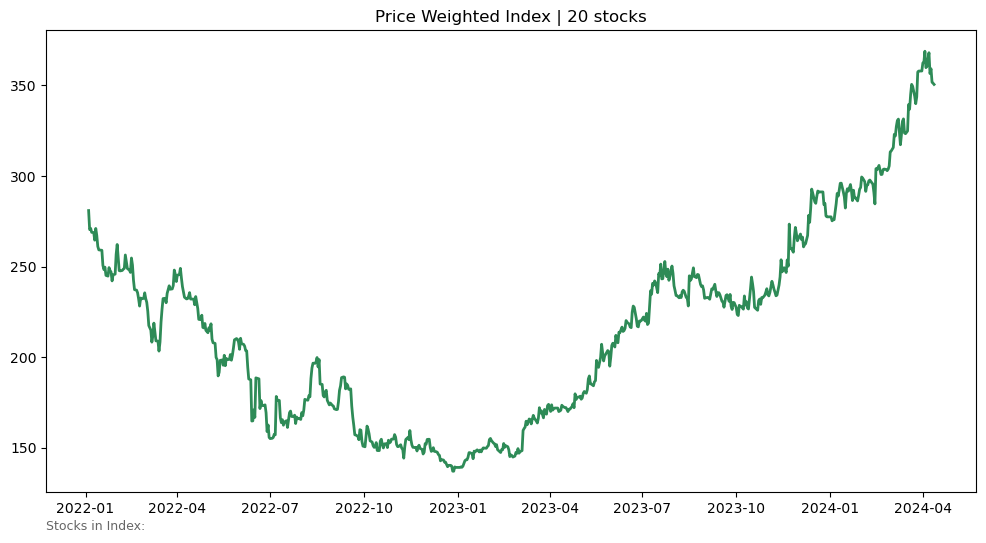

In [155]:
index_df = pd.concat([price_wgt_index_22.iloc[:,-1], price_wgt_index_23.iloc[:,-1]])
index_df = pd.concat([index_df, price_wgt_index_24.iloc[:,-1]])

#index_df

m = 20
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(index_df, color = 'seagreen', linewidth=2)
plt.title('Price Weighted Index | '+ str(m) + ' stocks')
plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
#plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
#plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.show()


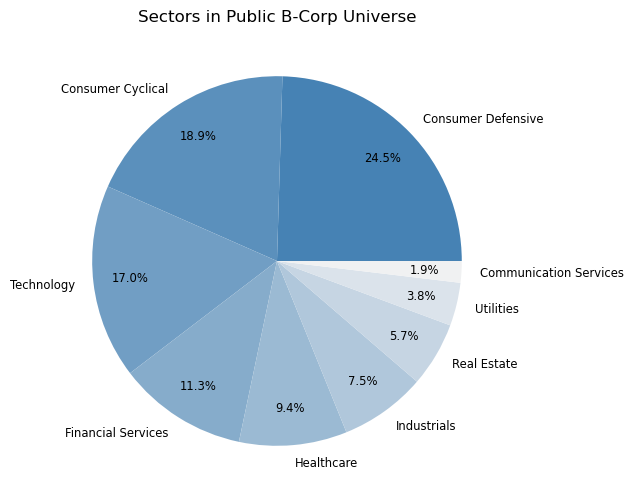

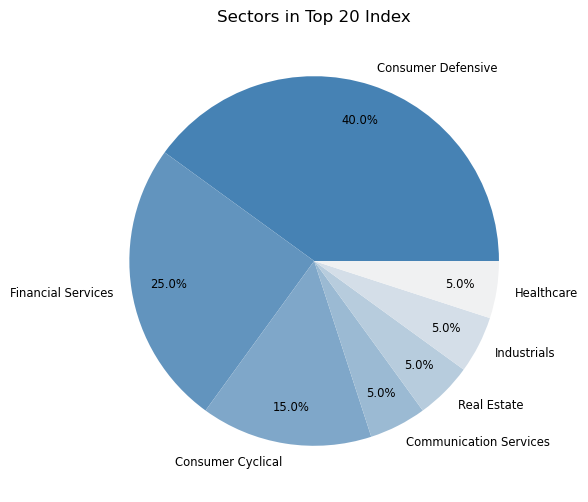

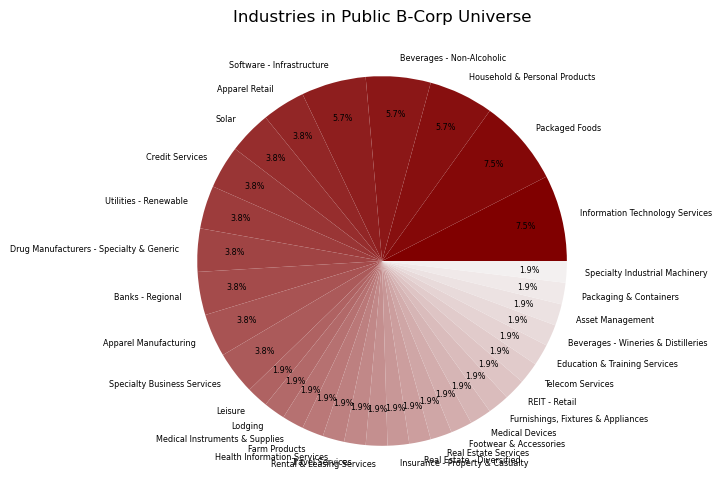

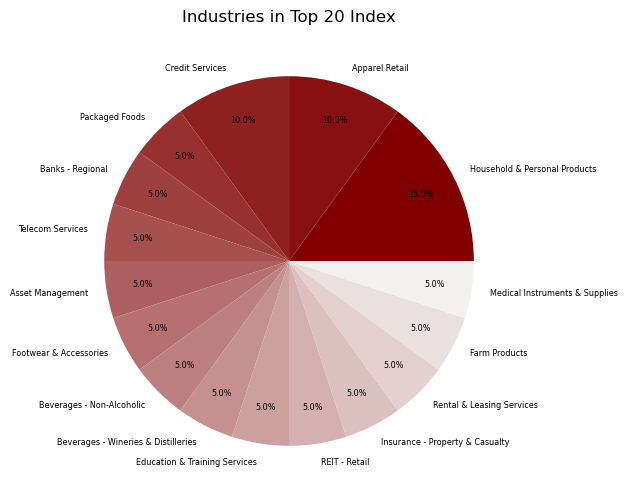

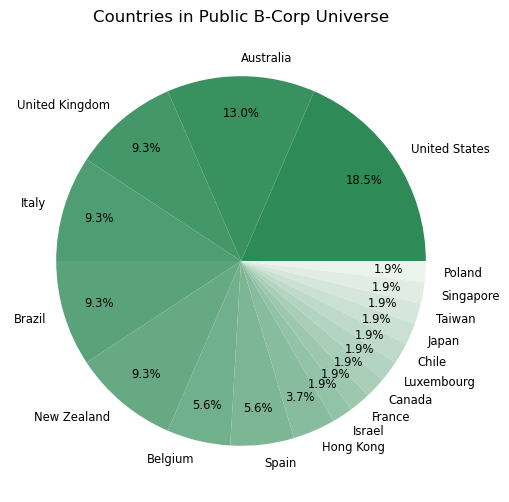

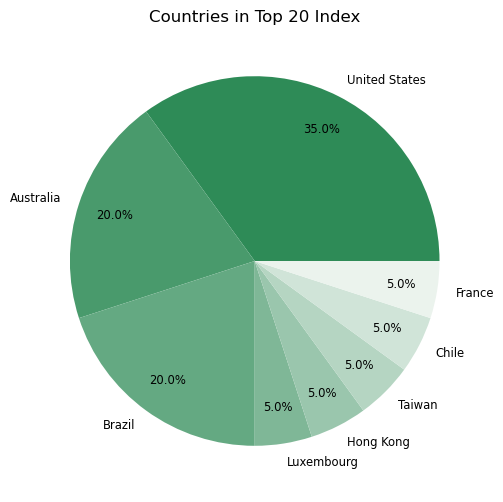

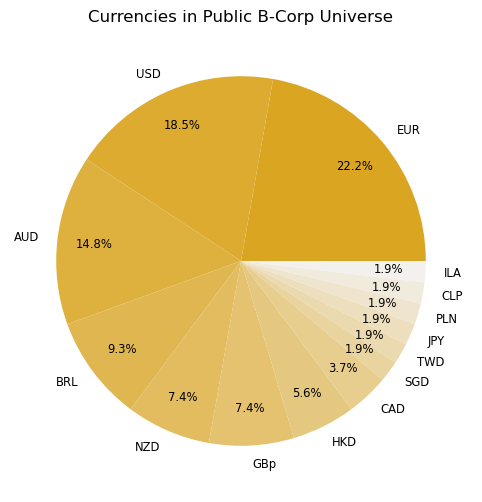

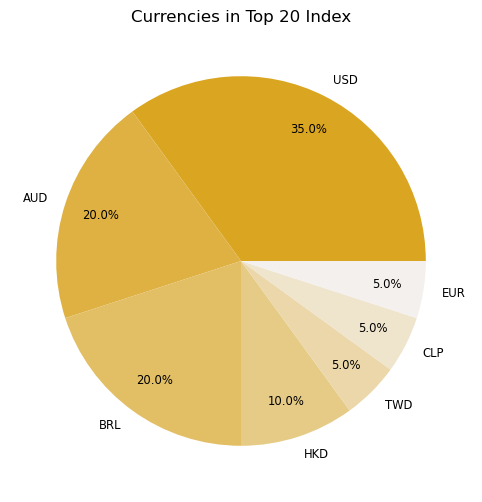

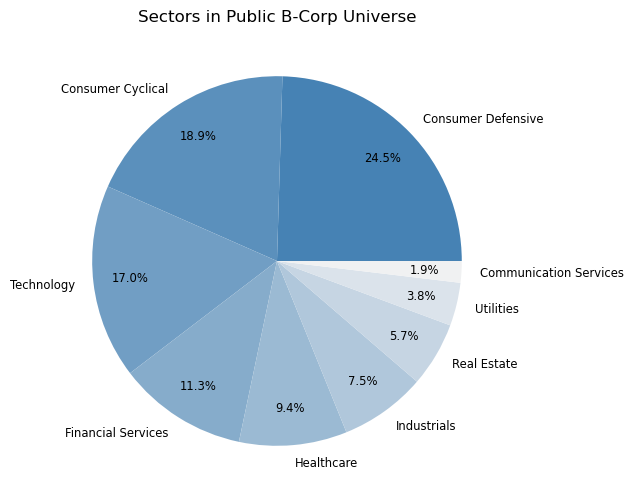

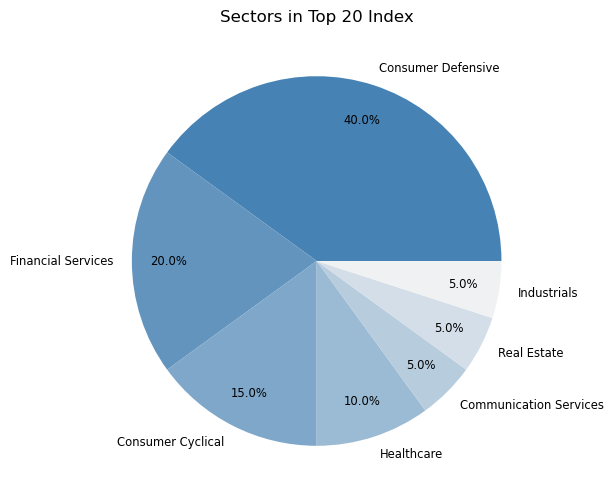

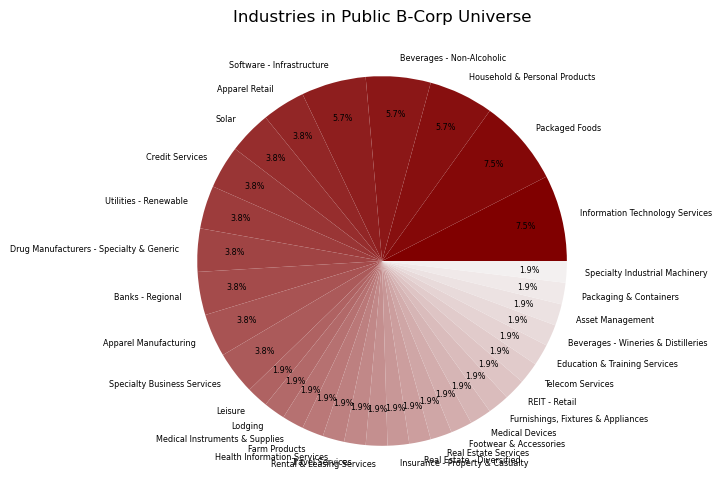

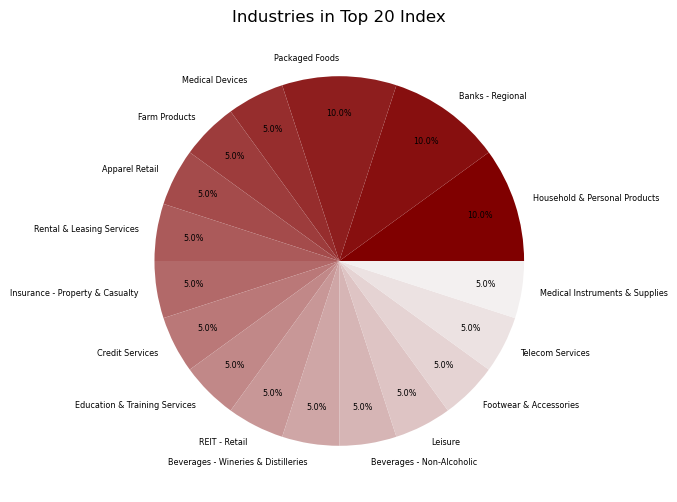

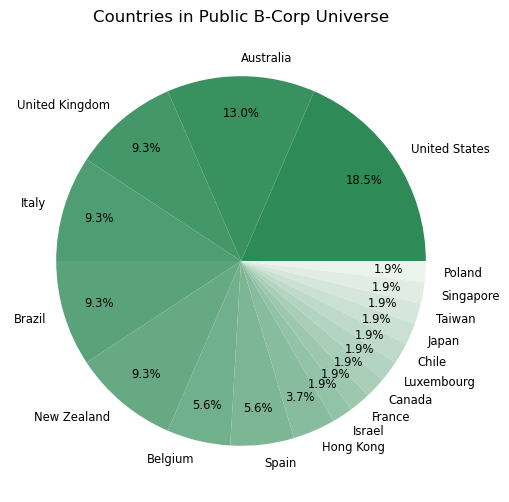

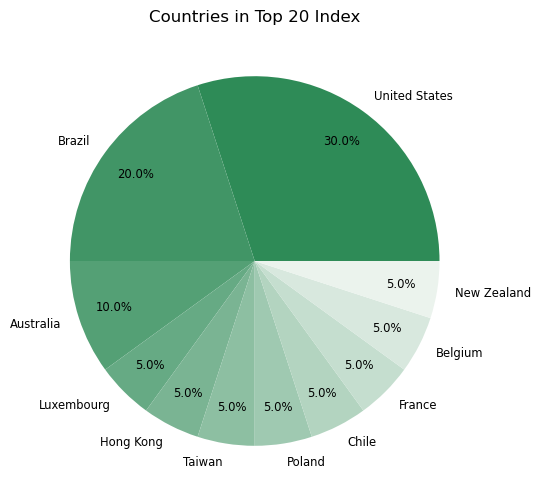

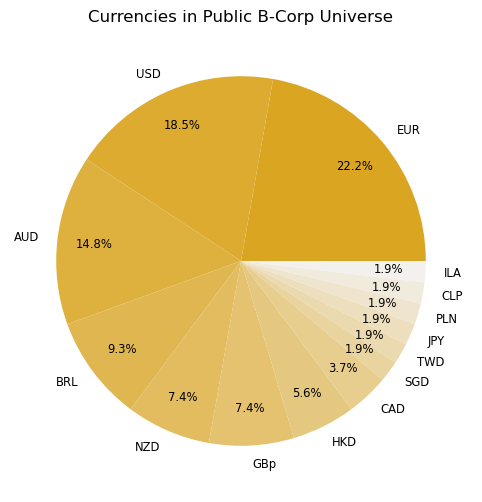

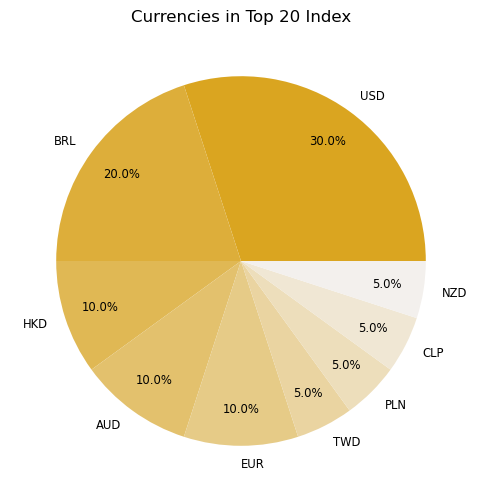

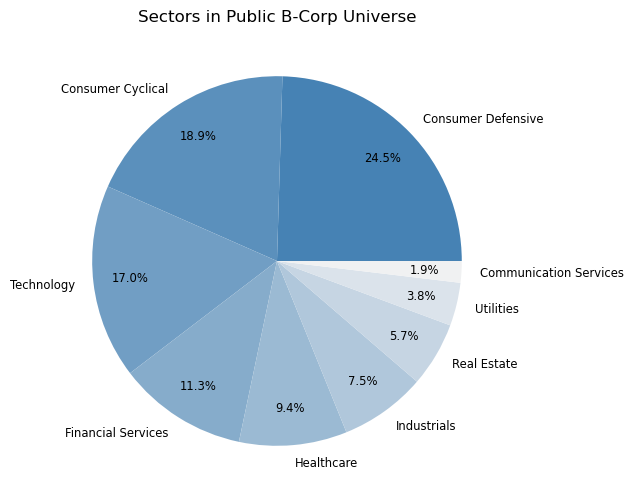

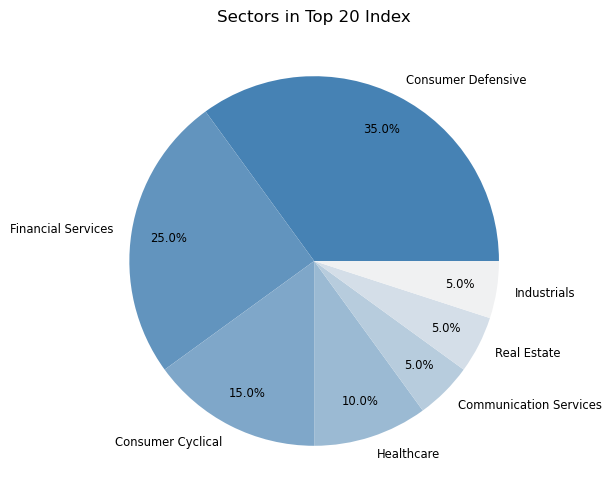

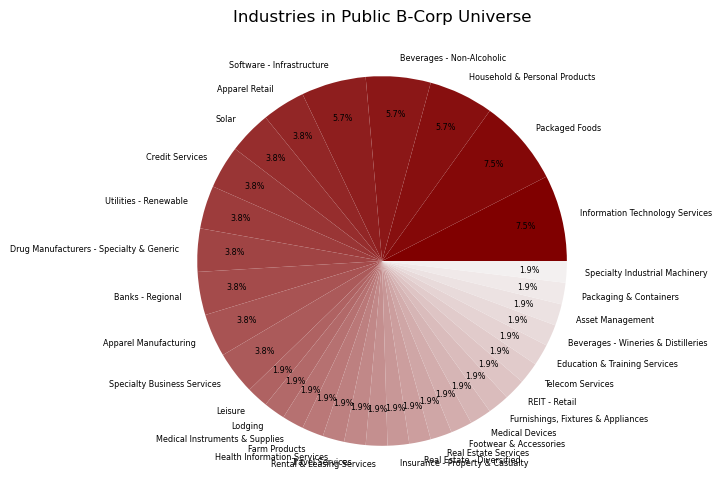

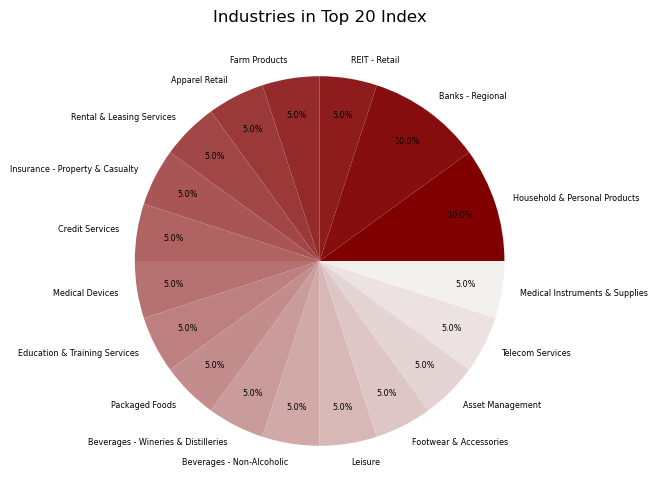

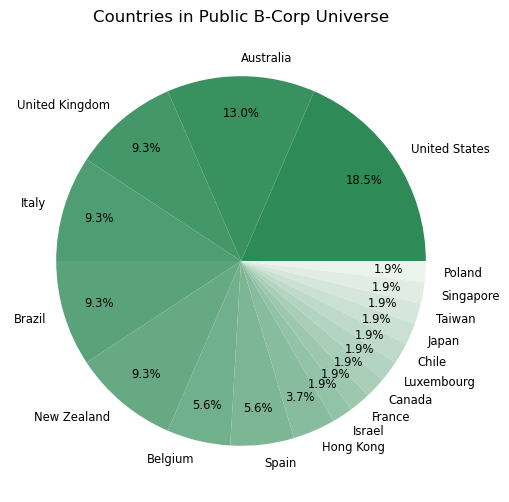

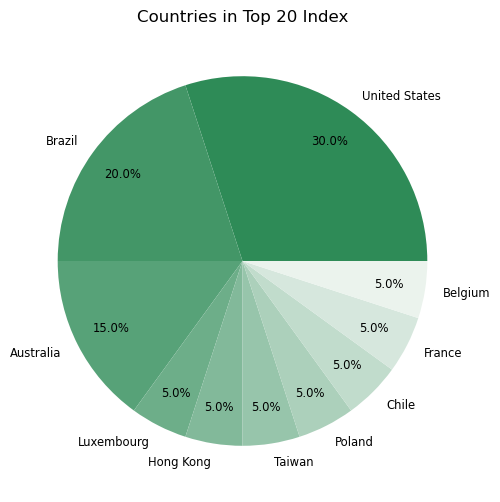

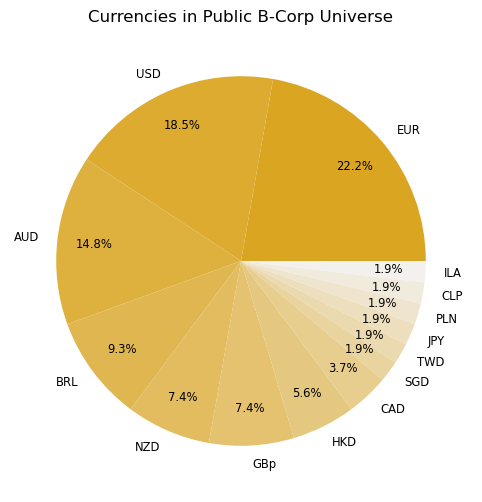

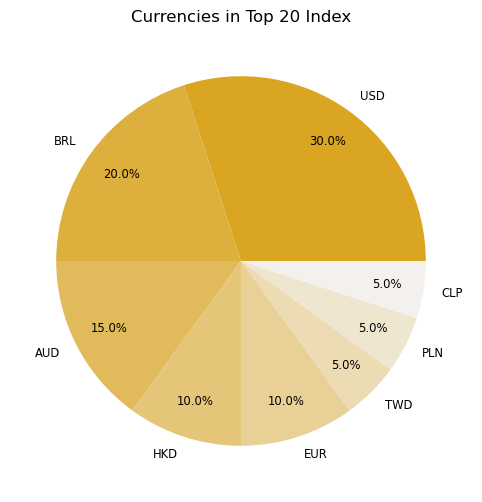

In [188]:
dfs = [df22, df23, df24]
px_indexs = [price_wgt_index_22, price_wgt_index_23, price_wgt_index_24]

for i in range(len(dfs)):
    tickers = [col[:-7] for col in px_indexs[i].columns][:-1]
    info = dfs[i].loc[dfs[i].index.isin(tickers)]

    visualize_groups(classify_all, info)


### COMPILE Market WEIGHTED INDEX and GRAPH PERFORMANCE

In [156]:
_,_,mkt_wgt_index_22,_ = construct_index_with_recon(df22, mw_divisor = 1000000000)
_, div1 = set_divisor(df22, df23, s0 = '2022-01-04', e0 = '2022-12-31', s1 = '2023-01-03', e1='2023-12-31', divisor=1000000000)

_, _, mkt_wgt_index_23, _ = construct_index_with_recon(df23, start_date = '2023-01-03', end_date = '2023-12-31', pw_divisor = div1)
_, div2 = set_divisor(df23, df24, s0 = '2023-01-03', e0 = '2023-12-31', s1 = '2024-01-02', e1='2024-04-15', divisor = div1)

_, _, mkt_wgt_index_24, _ = construct_index_with_recon(df24, start_date = '2024-01-02', end_date = '2024-04-15', pw_divisor = div2)



end year 0 1.3920564224317732e-07
beg year 1 3.4593662273774226e-07
PW Divisor =  2485076159.006746
beg year 1 23.399125694787884
Mkt Divisor =  1032012280.0414107
end year 0 6.680891507607916e-07
beg year 1 6.786501963878785e-07
PW Divisor =  1048326163.8469176
beg year 1 27.160403756664262
Mkt Divisor =  1030838865.5903246


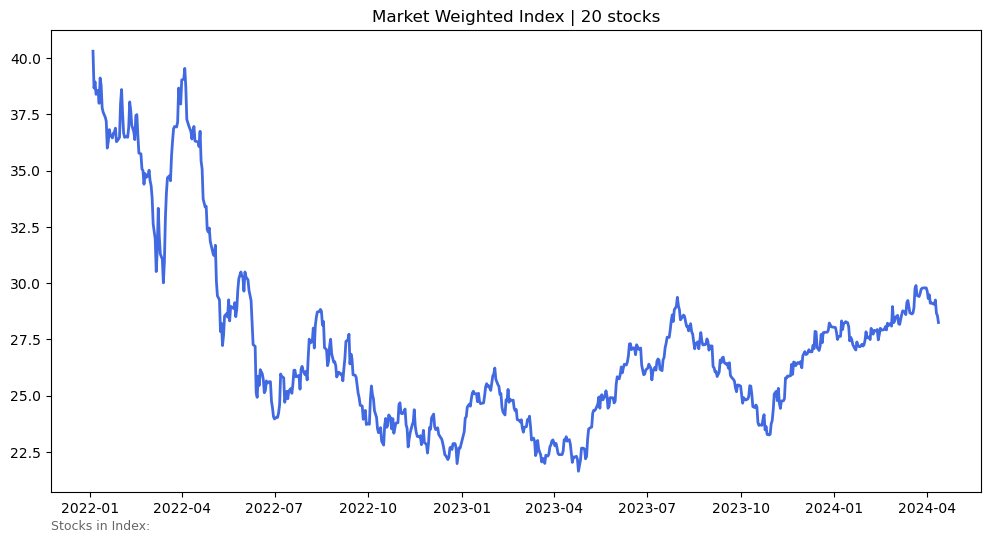

In [158]:
mkt_index_df = pd.concat([mkt_wgt_index_22.iloc[:,-1], mkt_wgt_index_23.iloc[:,-1]])
mkt_index_df = pd.concat([mkt_index_df, mkt_wgt_index_24.iloc[:,-1]])

#index_df

m = 20
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(mkt_index_df, color = 'royalblue', linewidth=2)
plt.title('Market Weighted Index | '+ str(m) + ' stocks')
plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
#plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
#plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.show()


In [159]:
download = True

In [160]:
if download == True:
    price_wgt_index_22.to_csv("px_weighted_idx_details_2022.csv")
    price_wgt_index_23.to_csv("px_weighted_idx_details_2023.csv")
    price_wgt_index_24.to_csv("px_weighted_idx_details_2024.csv")
    
    mkt_wgt_index_22.to_csv("mkt_weighted_idx_details_2022.csv")
    mkt_wgt_index_23.to_csv("mkt_weighted_idx_details_2023.csv")
    mkt_wgt_index_24.to_csv("mkt_weighted_idx_details_2024.csv")
        

Attributes = ['address1',
 'city',
 'state',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'compensationAsOfEpochDate',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'beta',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'enterpriseValue',
 'profitMargins',
 'floatShares',
 'sharesOutstanding',
 'sharesShort',
 'sharesShortPriorMonth',
 'sharesShortPreviousMonthDate',
 'dateShortInterest',
 'sharesPercentSharesOut',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'shortRatio',
 'shortPercentOfFloat',
 'impliedSharesOutstanding',
 'bookValue',
 'priceToBook',
 'lastFiscalYearEnd',
 'nextFiscalYearEnd',
 'mostRecentQuarter',
 'netIncomeToCommon',
 'trailingEps',
 'forwardEps',
 'pegRatio',
 'enterpriseToRevenue',
 'enterpriseToEbitda',
 '52WeekChange',
 'SandP52WeekChange',
 'exchange',
 'quoteType',
 'symbol',
 'underlyingSymbol',
 'shortName',
 'longName',
 'firstTradeDateEpochUtc',
 'timeZoneFullName',
 'timeZoneShortName',
 'uuid',
 'messageBoardId',
 'gmtOffSetMilliseconds',
 'currentPrice',
 'targetHighPrice',
 'targetLowPrice',
 'targetMeanPrice',
 'targetMedianPrice',
 'recommendationMean',
 'recommendationKey',
 'numberOfAnalystOpinions',
 'totalCash',
 'totalCashPerShare',
 'ebitda',
 'totalDebt',
 'quickRatio',
 'currentRatio',
 'totalRevenue',
 'debtToEquity',
 'revenuePerShare',
 'returnOnAssets',
 'returnOnEquity',
 'freeCashflow',
 'operatingCashflow',
 'revenueGrowth',
 'grossMargins',
 'ebitdaMargins',
 'operatingMargins',
 'financialCurrency',
 'trailingPegRatio']